# Title : Predict Future Blood Donation Trends Over Time Across Malaysian States

# 1. INTRODUCTION
The primary objective of this project is to forecast future blood donation trends across different states in Malaysia. Using historical blood donation data, we aim to predict the daily trend of blood donation in every state. These predictions will help healthcare organizations and blood banks better plan and manage donation drives, ensuring they meet the demand efficiently.

## Project Overview :
Blood donations are vital to healthcare systems, especially for emergency treatments, surgeries, and chronic disease management. A predictable supply of blood can prevent shortages and save lives. As a data analyst, my role involves analyzing historical blood donation data across Malaysian states and identifying trend analysis. The focus is to build predictive models to forecast daily blood donation trends. The analysis is designed to help blood banks manage their supply more effectively and prevent shortages or wastage.

### Key States Analyzed:
	•	Johor
	•	Kedah
	•	Kelantan
	•	W.P. Kuala Lumpur

## Problem Statement :
Blood banks often face challenges such as fluctuating donation rates, particularly influenced by seasonality, holidays, and unforeseen crises. This will give effects to the shortages during high-demand periods (emergencies, crises) and wastage during low-demand periods (overstocking). So, without effective forecasting, blood banks may struggle to maintain supply levels and respond to regional demand efficiently.

<body>
    <h2>Objectives :</h2>
    <ol>
        <li><strong>Trend Analysis</strong><br>
        Analyze historical trends in blood donations across different states.
        </li>
        <li><strong>Seasonality Detection</strong><br>
        Investigate how holidays, regional differences, and seasonal patterns influence donation rates.
        </li>
        <li><strong>Predictive Modelling</strong><br>
        Build models (using <strong>classification models</strong> such as Random Forest, Support Vector Machine (SVM), Decision Tree, Gradient Boosting Classifier and also using <strong>Time-Series models such as SARIMAX</strong>) to forecast future blood donations by specific dates.
        </li>
</body>

<body>
    <h3>Datasets Description:</h3> 
    <li>Source : Data.gov.my and Moh.gov.my</li>
    <h4>Dataframe</h4>
    <ol>
        <li><strong>Blood Donations State (2006-2024)</strong><br>
        Purpose: This dataset contains historical data on blood donations across various states in Malaysia. Key Variables : date (The date of blood donations), state (The Malaysian state where donations occurred), daily (The total number of blood donations for each day in a particular state), blood_a, blood_b, blood_o, blood_ab (The number of donations by blood type (A, B, O, AB) per state and date), type_wholeblood, type_apheresis_platelet, type_apheresis_plasma (The different types of blood donation procedures captured in the dataset), donation_PC1, donation_PC2 (Principal component analysis variables derived from donation features for feature reduction and analysis).
        </li>
        <li><strong>Donations State (2006-2024)</strong><br>
        Purpose: This dataset focuses on the demographic and socio-economic factors influencing blood donation rates. Key Variables: state (The Malaysian state), population (The total population for each state, which can be used to normalize donation rates), social_PC1, social_PC2, social_PC3 (Socio-economic principal component analysis variables that represent the social and economic features influencing donation behaviors), location_PC1, location_PC2 (Principal component analysis variables related to location-specific factors influencing blood donation rates).
        </li>
        <li><strong>Holiday Calendar</strong><br>
        Purpose: This dataset contains the dates of national and state-specific holidays across Malaysia, which are likely to influence blood donation trends. Key Variables: date (The date of the holiday), holiday_name (The name of the holiday (e.g., National Day, Eid, Deepavali)), is_public_holiday (A binary indicator specifying whether the holiday is a public holiday (1 for yes, 0 for no)), state (The state in which the holiday is observed (some holidays may be state-specific)).
        </li>
</body>
<body>
    <h3>How These Datasets Work Together:</h3> 
    <ol>
        <li><strong>blood_donations_state.csv </strong><br>
        Provides the core blood donation data, including the date, state, and types of donations.
        </li>
        <li><strong>donations_state.csv</strong><br>
        Offers socio-economic context and population data, which can be used for normalization and further feature engineering.
        </li>
        <li><strong>holiday_calendar.csv </strong><br>
        Introduces holiday data that allows for seasonality analysis, helping to investigate the impact of holidays on donation patterns across different states.
        </li> 
    </ol>
    <ol>These datasets, when combined, allow for trend analysis, seasonality detection, and the development of predictive models for better blood donation forecasting.
    </ol>
</body>

<body>
    <h2>Hypotheses:</h2>
    <ol>
        <li><strong>Seasonality Influence</strong><br>
        Blood donations follow specific seasonal trends. Holidays and festivals likely impact donation rates.
        </li>
        <li><strong>State Demographics</strong><br>
        States with different population demographics will exhibit varying donation rates. Certain states may have higher donation rates.
        </li>
        <li><strong>Forecasting Impact</strong><br>
        Predicting future blood donations will help blood banks manage supply and demand more efficiently, reducing both shortages and wastage.
        </li>
</body>

<body>
    <h2>Potential Applications :</h2>
    <ol>
        <li><strong>Blood Banks</strong><br>
        Optimize resource planning and campaign timing by forecasting donation trends.
        </li>
        <li><strong>Healthcare Organizations</strong><br>
        Prevent shortages during crises and holidays by ensuring sufficient supply.
        </li>
        <li><strong>Government & Policy Makers</strong><br>
        Plan and coordinate national campaigns by understanding state-wise trends and seasonality patterns.
        </li>
</body>

# 2. DATA LOADING AND EXPLORATION

### Data Import

In [1]:
# Import necessary libraries
import pandas as pd #used for data manipulation and analysis
import numpy as np #provides support for numerical operations and arrays
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations in Python.
import seaborn as sns #provides a high-level interface for drawing attractive and informative statistical graphics
import joblib
# from xgboost import XGBRegressor

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
blood_donations_state = pd.read_csv('blood_donations_state.csv')
blood_donations_state

,date,state,blood_type,donations
0,2006-01-01,Johor,all,87
1,2006-01-02,Johor,all,15
2,2006-01-03,Johor,all,8
3,2006-01-04,Johor,all,33
4,2006-01-05,Johor,all,20
...,...,...,...,...
444075,2024-09-10,W.P. Kuala Lumpur,ab,25
444076,2024-09-11,W.P. Kuala Lumpur,ab,26
444077,2024-09-12,W.P. Kuala Lumpur,ab,36
444078,2024-09-13,W.P. Kuala Lumpur,ab,35


In [3]:
# View unique state names
print(blood_donations_state['state'].unique())


['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang' 'Perak'
 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [4]:
blood_donations_state.head()

,date,state,blood_type,donations
0,2006-01-01,Johor,all,87
1,2006-01-02,Johor,all,15
2,2006-01-03,Johor,all,8
3,2006-01-04,Johor,all,33
4,2006-01-05,Johor,all,20


In [5]:
blood_donations_state.tail()

,date,state,blood_type,donations
444075,2024-09-10,W.P. Kuala Lumpur,ab,25
444076,2024-09-11,W.P. Kuala Lumpur,ab,26
444077,2024-09-12,W.P. Kuala Lumpur,ab,36
444078,2024-09-13,W.P. Kuala Lumpur,ab,35
444079,2024-09-14,W.P. Kuala Lumpur,ab,19


In [6]:
donations_state = pd.read_csv('donations_state.csv')
donations_state

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,109,553,643,13,6,0,610,46,6,106,352,204
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,92,335,405,11,11,0,388,35,4,55,318,54
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,138,312,428,15,7,0,409,38,3,43,342,65
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,124,544,668,0,0,0,621,42,5,88,466,114


In [7]:
# View unique state names
print(donations_state['state'].unique())


['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


### Data Overview

In [8]:
donations_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95676 entries, 0 to 95675
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   date                     95676 non-null  object
 1   state                    95676 non-null  object
 2   daily                    95676 non-null  int64 
 3   blood_a                  95676 non-null  int64 
 4   blood_b                  95676 non-null  int64 
 5   blood_o                  95676 non-null  int64 
 6   blood_ab                 95676 non-null  int64 
 7   location_centre          95676 non-null  int64 
 8   location_mobile          95676 non-null  int64 
 9   type_wholeblood          95676 non-null  int64 
 10  type_apheresis_platelet  95676 non-null  int64 
 11  type_apheresis_plasma    95676 non-null  int64 
 12  type_other               95676 non-null  int64 
 13  social_civilian          95676 non-null  int64 
 14  social_student           95676 non-nul

In [9]:
donations_state.columns

Index(['date', 'state', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab',
       'location_centre', 'location_mobile', 'type_wholeblood',
       'type_apheresis_platelet', 'type_apheresis_plasma', 'type_other',
       'social_civilian', 'social_student', 'social_policearmy',
       'donations_new', 'donations_regular', 'donations_irregular'],
      dtype='object')

In [10]:
donations_state.head(10)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,0,0,0,496,18,11,243,277,5
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,6,4,0,224,2,1,83,143,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,10,13,0,105,2,5,8,101,3
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,4,16,0,316,71,4,286,102,3
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,17,17,0,555,19,8,328,250,4
5,2006-01-06,Malaysia,324,94,77,126,27,171,153,302,9,13,0,306,12,6,162,161,1
6,2006-01-07,Malaysia,118,29,29,47,13,84,34,89,10,19,0,111,0,7,53,59,6
7,2006-01-08,Malaysia,795,218,212,314,51,315,480,795,0,0,0,649,142,4,368,412,15
8,2006-01-09,Malaysia,346,82,96,151,17,109,237,315,16,15,0,328,12,6,249,91,6
9,2006-01-10,Malaysia,2,1,0,1,0,2,0,2,0,0,0,2,0,0,0,2,0


In [11]:
donations_state.tail(10)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
95666,2024-09-07,W.P. Kuala Lumpur,917,269,242,360,46,200,717,892,16,9,0,825,81,11,141,568,208
95667,2024-09-08,W.P. Kuala Lumpur,925,261,244,380,40,226,699,925,0,0,0,852,66,7,117,674,134
95668,2024-09-09,W.P. Kuala Lumpur,522,135,138,219,30,123,399,498,15,9,0,479,40,3,86,332,104
95669,2024-09-10,W.P. Kuala Lumpur,535,152,147,211,25,103,432,516,13,6,0,466,64,5,100,302,133
95670,2024-09-11,W.P. Kuala Lumpur,511,149,142,194,26,99,412,490,14,7,0,430,74,7,111,314,86
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,109,553,643,13,6,0,610,46,6,106,352,204
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,92,335,405,11,11,0,388,35,4,55,318,54
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,138,312,428,15,7,0,409,38,3,43,342,65
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,124,544,668,0,0,0,621,42,5,88,466,114
95675,2024-09-16,W.P. Kuala Lumpur,643,179,176,261,27,135,508,621,11,11,0,592,45,6,111,408,124


In [12]:
donations_state.describe()

,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular
count,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000,95676.000000
mean,181.225804,45.010828,49.330010,75.631653,11.248631,95.497324,85.728479,177.571554,1.771792,1.534491,0.347966,155.218320,20.948681,5.058803,59.460157,98.250784,23.514863
std,375.023785,93.731903,101.838469,157.349847,23.291496,204.985670,237.805038,369.185331,4.819548,4.526221,4.573915,323.477845,58.300779,30.089084,128.484289,211.048068,58.148885
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,4.000000,5.000000,8.000000,1.000000,9.000000,0.000000,19.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,3.000000,10.000000,1.000000
50%,58.000000,14.000000,16.000000,24.000000,3.000000,35.000000,0.000000,57.000000,0.000000,0.000000,0.000000,52.000000,2.000000,0.000000,17.000000,29.000000,5.000000
75%,137.000000,34.000000,38.000000,57.000000,9.000000,88.000000,48.000000,136.000000,0.000000,0.000000,0.000000,124.000000,9.000000,1.000000,47.000000,73.000000,17.000000
max,5543.000000,1367.000000,1600.000000,2185.000000,391.000000,4674.000000,4047.000000,5514.000000,68.000000,80.000000,786.000000,4572.000000,928.000000,1585.000000,3587.000000,2947.000000,1263.000000


# 3. DATA CLEANING AND PREPROCESSING

In [13]:
# Load the uploaded files to begin data cleaning and preprocessing

# Define file paths for the uploaded files
blood_donations_state_file = 'blood_donations_state.csv'
donations_state_file = 'donations_state.csv'

# Load the datasets
blood_donations_state = pd.read_csv(blood_donations_state_file)
donations_state = pd.read_csv(donations_state_file)

# Display the first few rows of each dataset to understand the structure
blood_donations_state.head(), donations_state.head()


(         date  state blood_type  donations
 0  2006-01-01  Johor        all         87
 1  2006-01-02  Johor        all         15
 2  2006-01-03  Johor        all          8
 3  2006-01-04  Johor        all         33
 4  2006-01-05  Johor        all         20,
          date     state  daily  blood_a  blood_b  blood_o  blood_ab  \
 0  2006-01-01  Malaysia    525      152      139      194        40   
 1  2006-01-02  Malaysia    227       53       43      112        19   
 2  2006-01-03  Malaysia    112       29       21       56         6   
 3  2006-01-04  Malaysia    391       92       98      165        36   
 4  2006-01-05  Malaysia    582      149      198      193        42   
 
    location_centre  location_mobile  type_wholeblood  type_apheresis_platelet  \
 0              308              217              525                        0   
 1              162               65              217                        6   
 2              112                0               89  

### Missing Values

In [14]:
# Step 1: Check for missing values in both datasets
print("Missing values in blood_donations_state:")
print(blood_donations_state.isnull().sum())

print("\nMissing values in donations_state:")
print(donations_state.isnull().sum())

# Step 2: Convert 'date' column to datetime in both datasets
blood_donations_state['date'] = pd.to_datetime(blood_donations_state['date'], errors='coerce')
donations_state['date'] = pd.to_datetime(donations_state['date'], errors='coerce')

# Step 3: Extract 'year' and 'month' from 'date'
blood_donations_state['year'] = blood_donations_state['date'].dt.year
blood_donations_state['month'] = blood_donations_state['date'].dt.month

donations_state['year'] = donations_state['date'].dt.year
donations_state['month'] = donations_state['date'].dt.month


Missing values in blood_donations_state:
date          0
state         0
blood_type    0
donations     0
dtype: int64

Missing values in donations_state:
date                       0
state                      0
daily                      0
blood_a                    0
blood_b                    0
blood_o                    0
blood_ab                   0
location_centre            0
location_mobile            0
type_wholeblood            0
type_apheresis_platelet    0
type_apheresis_plasma      0
type_other                 0
social_civilian            0
social_student             0
social_policearmy          0
donations_new              0
donations_regular          0
donations_irregular        0
dtype: int64


### Merge the dataframes

In [15]:
donations_state

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,location_centre,location_mobile,type_wholeblood,...,type_apheresis_plasma,type_other,social_civilian,social_student,social_policearmy,donations_new,donations_regular,donations_irregular,year,month
0,2006-01-01,Malaysia,525,152,139,194,40,308,217,525,...,0,0,496,18,11,243,277,5,2006,1
1,2006-01-02,Malaysia,227,53,43,112,19,162,65,217,...,4,0,224,2,1,83,143,1,2006,1
2,2006-01-03,Malaysia,112,29,21,56,6,112,0,89,...,13,0,105,2,5,8,101,3,2006,1
3,2006-01-04,Malaysia,391,92,98,165,36,145,246,371,...,16,0,316,71,4,286,102,3,2006,1
4,2006-01-05,Malaysia,582,149,198,193,42,371,211,548,...,17,0,555,19,8,328,250,4,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,109,553,643,...,6,0,610,46,6,106,352,204,2024,9
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,92,335,405,...,11,0,388,35,4,55,318,54,2024,9
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,138,312,428,...,7,0,409,38,3,43,342,65,2024,9
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,124,544,668,...,0,0,621,42,5,88,466,114,2024,9


In [16]:
# View unique state names
print(donations_state['state'].unique())


['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


# 4. FEATURE ENGINEERING

### Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

# Define the features you want to apply PCA to
social_features = ['social_civilian', 'social_student', 'social_policearmy']
donation_features = ['donations_new', 'donations_regular', 'donations_irregular']
location = ['location_centre', 'location_mobile']

# Standardize the features
scaler = StandardScaler()

# Assuming your data is in a DataFrame called df
social_scaled = scaler.fit_transform(donations_state[social_features])
donation_scaled = scaler.fit_transform(donations_state[donation_features])
location_scaled = scaler.fit_transform(donations_state[location])

### Principle Component Analysis (PCA)

•	Extraction of trends, holidays, and public holidays.

•	Principal Component Analysis (PCA) applied to reduce the dimensionality of features (social_PC1, donation_PC1, etc.).

In [18]:
from sklearn.decomposition import PCA

# Apply PCA to social features
pca_social = PCA(n_components=0.95)  # Retain 95% of variance
social_pca = pca_social.fit_transform(social_scaled)

# Apply PCA to donation features
pca_donation = PCA(n_components=0.95)
donation_pca = pca_donation.fit_transform(donation_scaled)

pca_location = PCA(n_components=0.95)
location_pca = pca_location.fit_transform(location_scaled)


In [19]:
# Explained variance for social features
print("Explained variance for social features:", pca_social.explained_variance_ratio_)

# Explained variance for donation features
print("Explained variance for donation features:", pca_donation.explained_variance_ratio_)

print("Explained variance for location features:", pca_location.explained_variance_ratio_)


Explained variance for social features: [0.61411866 0.278726   0.10715534]
Explained variance for donation features: [0.8707329  0.10821904]
Explained variance for location features: [0.71577124 0.28422876]


In [20]:
import pandas as pd

# Convert the PCA results into a DataFrame
# If you decide to keep both PC1 and PC2 for social features:
social_pca_df = pd.DataFrame(social_pca, columns=['social_PC1', 'social_PC2', 'social_PC3'])

# For donation features (only PC1):
donation_pca_df = pd.DataFrame(donation_pca, columns=['donation_PC1', 'donation_PC2'])

location_pca_df = pd.DataFrame(location_pca, columns=['location_PC1', 'location_PC2'])

# Reset the index of merged_df to ensure alignment with PCA DataFrames
donations_state.reset_index(drop=True, inplace=True)

# Concatenate the new PCA columns back into merged_df
donations_state_pca = pd.concat([donations_state, social_pca_df, donation_pca_df, location_pca_df], axis=1)

# Drop the original social and donation features (optional)
donations_state_pca = donations_state_pca.drop(columns=social_features + donation_features + location)


In [21]:
final_data = donations_state_pca.copy()

In [22]:
final_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,type_other,year,month,social_PC1,social_PC2,social_PC3,donation_PC1,donation_PC2,location_PC1,location_PC2
0,2006-01-01,Malaysia,525,152,139,194,40,525,0,0,0,2006,1,0.729904,-0.096425,0.780608,1.108126,1.153906,1.123375,-0.342707
1,2006-01-02,Malaysia,227,53,43,112,19,217,6,4,0,2006,1,-0.126485,-0.086889,0.381441,0.003406,0.315713,0.167769,-0.291041
2,2006-01-03,Malaysia,112,29,21,56,6,89,10,13,0,2006,1,-0.311290,0.136672,0.118999,-0.416340,-0.134351,-0.197986,-0.311840
3,2006-01-04,Malaysia,391,92,98,165,36,371,4,16,0,2006,1,0.862338,-0.422023,-0.252178,0.771928,1.618098,0.647328,0.305803
4,2006-01-05,Malaysia,582,149,198,193,42,548,17,17,0,2006,1,0.818967,-0.243219,0.899021,1.383512,1.726307,1.322857,-0.577870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,0,2024,9,1.201399,-0.487139,0.693948,2.724272,-1.656637,1.436005,1.342848
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,0,2024,9,0.607886,-0.302374,0.340929,0.912595,-0.533575,0.729142,0.753270
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,0,2024,9,0.669781,-0.365879,0.351084,1.039732,-0.736614,0.819431,0.526200
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,0,2024,9,1.165725,-0.506820,0.766806,2.074680,-1.037085,1.460987,1.264343


In [23]:
# View unique state names
print(final_data['state'].unique())


['Malaysia' 'Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [24]:
final_data['date'] = pd.to_datetime(final_data['date'])


In [25]:
final_data['day'] = final_data['date'].dt.day

### Identify Trends

In [26]:
# Assuming final_data is your dataframe
final_data['date'] = pd.to_datetime(final_data['date'])

# Sort the data by 'state' and 'date' to calculate trends in sequential order
final_data = final_data.sort_values(by=['state', 'date'])

# Calculate the difference in blood donations from the previous day for each blood type
final_data['diff_a'] = final_data.groupby('state')['blood_a'].diff()
final_data['diff_b'] = final_data.groupby('state')['blood_b'].diff()
final_data['diff_ab'] = final_data.groupby('state')['blood_ab'].diff()
final_data['diff_o'] = final_data.groupby('state')['blood_o'].diff()

# Define a function to categorize the trend
def calculate_trend(diff):
    if diff > 0:
        return 'uptrend'
    elif diff < 0:
        return 'downtrend'
    else:
        return 'stable'

# Apply the function to each blood type's diff column to create trend columns
final_data['trend_a'] = final_data['diff_a'].apply(calculate_trend)
final_data['trend_b'] = final_data['diff_b'].apply(calculate_trend)
final_data['trend_ab'] = final_data['diff_ab'].apply(calculate_trend)
final_data['trend_o'] = final_data['diff_o'].apply(calculate_trend)

# Drop unnecessary diff columns (if you don't need them)
final_data = final_data.drop(columns=['diff_a', 'diff_b', 'diff_ab', 'diff_o'])

# Check the new data with trend columns
final_data


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,social_PC3,donation_PC1,donation_PC2,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.091326,-0.455377,0.103413,-0.284225,-0.225601,1,stable,stable,stable,stable
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.052262,-0.720272,-0.041792,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.067610,-0.735948,-0.057841,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.015366,-0.639291,0.093648,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.084146,-0.681960,0.032452,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,0.693948,2.724272,-1.656637,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.340929,0.912595,-0.533575,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,0.351084,1.039732,-0.736614,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,0.766806,2.074680,-1.037085,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend


### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'state' column
final_data['encoded_state'] = label_encoder.fit_transform(final_data['state'])

# Display the unique mappings of state to integer values
state_mappings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("State to Integer Mapping:", state_mappings)

# Show a few rows of the dataframe with the encoded state
final_data


State to Integer Mapping: {'Johor': np.int64(0), 'Kedah': np.int64(1), 'Kelantan': np.int64(2), 'Malaysia': np.int64(3), 'Melaka': np.int64(4), 'Negeri Sembilan': np.int64(5), 'Pahang': np.int64(6), 'Perak': np.int64(7), 'Pulau Pinang': np.int64(8), 'Sabah': np.int64(9), 'Sarawak': np.int64(10), 'Selangor': np.int64(11), 'Terengganu': np.int64(12), 'W.P. Kuala Lumpur': np.int64(13)}


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o,encoded_state
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.455377,0.103413,-0.284225,-0.225601,1,stable,stable,stable,stable,0
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.720272,-0.041792,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend,0
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.735948,-0.057841,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend,0
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.639291,0.093648,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend,0
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.681960,0.032452,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,2.724272,-1.656637,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend,13
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.912595,-0.533575,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend,13
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,1.039732,-0.736614,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend,13
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,2.074680,-1.037085,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend,13


In [28]:
# Step 2: Extract the year
final_data['year'] = final_data['date'].dt.year

# Step 3: Extract the month
final_data['month'] = final_data['date'].dt.month

In [29]:
# View unique state names
print(final_data['state'].unique())


['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [30]:
final_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o,encoded_state
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.455377,0.103413,-0.284225,-0.225601,1,stable,stable,stable,stable,0
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.720272,-0.041792,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend,0
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.735948,-0.057841,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend,0
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.639291,0.093648,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend,0
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.681960,0.032452,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,2.724272,-1.656637,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend,13
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.912595,-0.533575,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend,13
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,1.039732,-0.736614,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend,13
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,2.074680,-1.037085,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend,13


In [31]:
final_data.columns

Index(['date', 'state', 'daily', 'blood_a', 'blood_b', 'blood_o', 'blood_ab',
       'type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma',
       'type_other', 'year', 'month', 'social_PC1', 'social_PC2', 'social_PC3',
       'donation_PC1', 'donation_PC2', 'location_PC1', 'location_PC2', 'day',
       'trend_a', 'trend_b', 'trend_ab', 'trend_o', 'encoded_state'],
      dtype='object')

In [32]:
final_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o,encoded_state
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.455377,0.103413,-0.284225,-0.225601,1,stable,stable,stable,stable,0
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.720272,-0.041792,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend,0
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.735948,-0.057841,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend,0
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.639291,0.093648,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend,0
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.681960,0.032452,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,2.724272,-1.656637,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend,13
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.912595,-0.533575,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend,13
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,1.039732,-0.736614,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend,13
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,2.074680,-1.037085,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend,13


In [33]:
import pandas as pd
import calendar

# Ensure 'date' column is in datetime format
final_data['date'] = pd.to_datetime(final_data['date'])

# Use the 'dt.weekday' to get the day of the week as an integer (Monday=0, Sunday=6)
# Then map it to the day name using calendar.day_name
final_data['day_of_week'] = final_data['date'].dt.weekday.map(lambda x: calendar.day_name[x])

# Display the updated DataFrame
print(final_data[['date', 'day_of_week']].head(7))


           date day_of_week
6834 2006-01-01      Sunday
6835 2006-01-02      Monday
6836 2006-01-03     Tuesday
6837 2006-01-04   Wednesday
6838 2006-01-05    Thursday
6839 2006-01-06      Friday
6840 2006-01-07    Saturday


In [34]:
final_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o,encoded_state,day_of_week
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,stable,stable,stable,stable,0,Sunday
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend,0,Monday
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend,0,Tuesday
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend,0,Wednesday
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend,0,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend,13,Thursday
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend,13,Friday
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend,13,Saturday
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend,13,Sunday


In [35]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'day_of_week' column
final_data['encoded_day'] = label_encoder.fit_transform(final_data['day_of_week'])

# Display the updated DataFrame
print(final_data[['day_of_week', 'encoded_day']].head(7))


     day_of_week  encoded_day
6834      Sunday            3
6835      Monday            1
6836     Tuesday            5
6837   Wednesday            6
6838    Thursday            4
6839      Friday            0
6840    Saturday            2


In [36]:
final_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o,encoded_state,day_of_week,encoded_day
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.284225,-0.225601,1,stable,stable,stable,stable,0,Sunday,3
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend,0,Monday,1
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend,0,Tuesday,5
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend,0,Wednesday,6
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend,0,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend,13,Thursday,4
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend,13,Friday,0
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend,13,Saturday,2
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend,13,Sunday,3


In [37]:
daily_donation = final_data.copy()
daily_donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,location_PC1,location_PC2,day,trend_a,trend_b,trend_ab,trend_o,encoded_state,day_of_week,encoded_day
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.284225,-0.225601,1,stable,stable,stable,stable,0,Sunday,3
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.532593,0.022768,2,downtrend,downtrend,downtrend,downtrend,0,Monday,1
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.556740,0.046915,3,downtrend,downtrend,downtrend,downtrend,0,Tuesday,5
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.470501,-0.039324,4,uptrend,uptrend,uptrend,uptrend,0,Wednesday,6
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.515345,0.005520,5,downtrend,downtrend,downtrend,downtrend,0,Thursday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,1.436005,1.342848,12,uptrend,uptrend,uptrend,uptrend,13,Thursday,4
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.729142,0.753270,13,downtrend,downtrend,downtrend,downtrend,13,Friday,0
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,0.819431,0.526200,14,uptrend,uptrend,downtrend,downtrend,13,Saturday,2
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,1.460987,1.264343,15,uptrend,uptrend,uptrend,uptrend,13,Sunday,3


In [38]:
# Create the 'daily_trend' column based on comparison with the previous day's 'daily' value
daily_donation['daily_trend'] = daily_donation['daily'].diff().apply(lambda x: 'uptrend' if x > 0 else ('downtrend' if x < 0 else 'stable'))

# Drop the specified columns
daily_donation = daily_donation.drop(columns=['trend_a', 'trend_b', 'trend_ab', 'trend_o'])

# Display the updated DataFrame
daily_donation


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,social_PC3,donation_PC1,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.091326,-0.455377,0.103413,-0.284225,-0.225601,1,0,Sunday,3,stable
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.052262,-0.720272,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.067610,-0.735948,-0.057841,-0.556740,0.046915,3,0,Tuesday,5,downtrend
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.015366,-0.639291,0.093648,-0.470501,-0.039324,4,0,Wednesday,6,uptrend
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.084146,-0.681960,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,0.693948,2.724272,-1.656637,1.436005,1.342848,12,13,Thursday,4,uptrend
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.340929,0.912595,-0.533575,0.729142,0.753270,13,13,Friday,0,downtrend
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,0.351084,1.039732,-0.736614,0.819431,0.526200,14,13,Saturday,2,uptrend
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,0.766806,2.074680,-1.037085,1.460987,1.264343,15,13,Sunday,3,uptrend


In [39]:
# View unique state names
print(daily_donation['state'].unique())


['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [40]:
# Define the new mapping for encoded_day
new_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

# Update the encoded_day column using the new mapping
daily_donation['encoded_day'] = daily_donation['day_of_week'].map(new_mapping)

# Display the updated DataFrame
daily_donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,social_PC3,donation_PC1,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.091326,-0.455377,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.052262,-0.720272,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.067610,-0.735948,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.015366,-0.639291,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.084146,-0.681960,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,0.693948,2.724272,-1.656637,1.436005,1.342848,12,13,Thursday,4,uptrend
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.340929,0.912595,-0.533575,0.729142,0.753270,13,13,Friday,5,downtrend
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,0.351084,1.039732,-0.736614,0.819431,0.526200,14,13,Saturday,6,uptrend
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,0.766806,2.074680,-1.037085,1.460987,1.264343,15,13,Sunday,0,uptrend


### Merged Dataframe Holiday

In [41]:
holiday = pd.read_csv('holiday_calendar.csv')
holiday

,Country,Country Code,Day,Date,Holiday Name,Type,state
0,malaysia,MY,Saturday,2022-01-01,New Year's Day,Regional Holiday,All
1,malaysia,MY,Friday,2022-01-14,Birthday of the Sultan of Negeri Sembilan,Regional Holiday,Negeri Sembilan
2,malaysia,MY,Tuesday,2022-01-18,Thaipusam,Regional Holiday,All
3,malaysia,MY,Tuesday,2022-02-01,Chinese New Year,National Holiday,All
4,malaysia,MY,Tuesday,2022-02-01,Federal Territory Day,Regional Holiday,W.P. Kuala Lumpur
5,malaysia,MY,Wednesday,2022-02-02,Chinese New Year Holiday,National Holiday,All
6,malaysia,MY,Friday,2022-03-04,Anniversary of Installation of the Sultan,Regional Holiday,Terengganu
7,malaysia,MY,Wednesday,2022-03-23,Birthday of the Sultan of Johor,Regional Holiday,Johor
8,malaysia,MY,Friday,2022-04-15,Declaration of Malacca as a Historical City,Regional Holiday,Melaka
9,malaysia,MY,Friday,2022-04-15,Good Friday,Regional Holiday,"Sabah,Sarawak"


In [42]:
# Replace all null values in the 'State' column with 'All''
holiday['state'] = holiday['state'].fillna('All')

In [43]:
# Define the replacement string with all the state names
all_states = "W.P. Kuala Lumpur,Selangor,Pulau Pinang,Johor,Perak,Sabah,Kelantan,Pahang,Negeri Sembilan,Melaka,Terengganu,Kedah,Sarawak"


In [44]:
# Replace "All" in the 'State' column with the list of all states
holiday['state'] = holiday['state'].replace('All', all_states)

In [45]:
# Extract the month and year and create new columns
holiday['Date'] = pd.to_datetime(holiday['Date'])  # Convert 'Date' column to datetime
holiday['month'] = holiday['Date'].dt.month       # Extract month
holiday['day'] = holiday['Date'].dt.day         # Extract day

In [46]:
# Drop the 'Date' column after extraction
holiday.drop('Date', axis=1, inplace=True)

In [47]:
# Drop 'Country', 'Country Code', 'Day' columns
holiday.drop(['Country', 'Country Code', 'Day', 'Holiday Name', 'Type'], axis=1, inplace=True)

In [48]:
# Separate the state values by comma and put them in different rows (1 row per state)
holiday = holiday.assign(state=holiday['state'].str.split(',')).explode('state')

In [49]:
# Reset the index after the operations
holiday.reset_index(drop=True, inplace=True)

In [50]:
holiday

,state,month,day
0,W.P. Kuala Lumpur,1,1
1,Selangor,1,1
2,Pulau Pinang,1,1
3,Johor,1,1
4,Perak,1,1
...,...,...,...
176,Negeri Sembilan,12,26
177,Melaka,12,26
178,Terengganu,12,26
179,Kedah,12,26


In [51]:
# Define the encoding for the states
state_encoding = {
    'Johor': 0,
    'Kedah': 1,
    'Kelantan': 2,
    'Melaka': 3,
    'Negeri Sembilan': 4,
    'Pahang': 5,
    'Perak': 6,
    'Pulau Pinang': 7,
    'Sabah': 8,
    'Sarawak': 9,
    'Selangor': 10,
    'Terengganu': 11,
    'W.P. Kuala Lumpur': 12
}

# Create the 'encoded_state' column by mapping the 'state' column to the encoding dictionary
holiday['encoded_state'] = holiday['state'].map(state_encoding)

# Display the updated DataFrame
holiday


,state,month,day,encoded_state
0,W.P. Kuala Lumpur,1,1,12
1,Selangor,1,1,10
2,Pulau Pinang,1,1,7
3,Johor,1,1,0
4,Perak,1,1,6
...,...,...,...,...
176,Negeri Sembilan,12,26,4
177,Melaka,12,26,3
178,Terengganu,12,26,11
179,Kedah,12,26,1


In [52]:
# Initialize the 'holiday' column with 0
daily_donation['holiday'] = 0

# Set holiday to 1 where there are matches with the holiday DataFrame
matches = daily_donation.merge(holiday, on=['day', 'month', 'encoded_state'], how='left', indicator=True)
daily_donation.loc[matches['_merge'] == 'both', 'holiday'] = 1

# Set holiday to 1 for Saturdays
daily_donation.loc[daily_donation['day_of_week'] == 'Saturday', 'holiday'] = 1

# Define states with Friday holiday
friday_states = ['Johor', 'Kedah', 'Kelantan', 'Terengganu']

# Set holiday to 1 for Fridays in specified states
daily_donation.loc[(daily_donation['day_of_week'] == 'Friday') & 
                   (daily_donation['encoded_state'].isin(friday_states)), 'holiday'] = 1

# Set holiday to 1 for Sundays for states other than specified
daily_donation.loc[(daily_donation['day_of_week'] == 'Sunday') & 
                   (~daily_donation['encoded_state'].isin(friday_states)), 'holiday'] = 1

# Display the updated DataFrame
daily_donation.tail(30)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday
95646,2024-08-18,W.P. Kuala Lumpur,916,238,240,392,46,916,0,0,...,3.197080,-1.584729,2.225072,1.642078,18,13,Sunday,0,uptrend,1
95647,2024-08-19,W.P. Kuala Lumpur,197,56,43,91,7,178,9,10,...,0.045661,-0.397134,0.045239,0.069368,19,13,Monday,1,downtrend,0
95648,2024-08-20,W.P. Kuala Lumpur,411,95,108,184,24,393,13,5,...,1.240058,-0.805635,0.687279,0.628618,20,13,Tuesday,2,uptrend,0
95649,2024-08-21,W.P. Kuala Lumpur,583,157,156,236,34,568,13,2,...,2.120976,-1.087320,1.201099,1.107942,21,13,Wednesday,3,uptrend,0
95650,2024-08-22,W.P. Kuala Lumpur,454,111,131,191,21,434,13,7,...,1.548865,-0.700418,0.816091,0.743632,22,13,Thursday,4,downtrend,0
95651,2024-08-23,W.P. Kuala Lumpur,358,83,91,157,27,343,9,6,...,0.739571,-0.340760,0.520162,0.599484,23,13,Friday,5,downtrend,0
95652,2024-08-24,W.P. Kuala Lumpur,756,204,190,326,36,731,16,9,...,2.559417,-1.274752,1.742649,1.256242,24,13,Saturday,6,uptrend,1
95653,2024-08-25,W.P. Kuala Lumpur,1018,262,271,435,50,1018,0,0,...,3.739307,-1.292159,2.520274,2.054565,25,13,Sunday,0,uptrend,1
95654,2024-08-26,W.P. Kuala Lumpur,264,65,71,110,18,241,13,10,...,0.223531,-0.125224,0.244939,0.262169,26,13,Monday,1,downtrend,0
95655,2024-08-27,W.P. Kuala Lumpur,374,92,104,151,27,355,13,6,...,0.653998,-0.130048,0.563454,0.704867,27,13,Tuesday,2,uptrend,0


In [53]:
# View unique state names
print(daily_donation['state'].unique())


['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [54]:
# Filter for rows with month=8, day=31, and year=2022
result = daily_donation[(daily_donation['month'] == 8) & 
                        (daily_donation['day'] == 31) & 
                        (daily_donation['year'] == 2022)]

# Drop duplicates to ensure each state appears only once
result_unique_states = result.drop_duplicates(subset=['state'])

# Display the result
result_unique_states

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday
12920,2022-08-31,Johor,209,56,55,92,6,209,0,0,...,0.200664,-0.327442,0.037123,0.695970,31,0,Wednesday,3,uptrend,1
19754,2022-08-31,Kedah,95,19,36,31,9,95,0,0,...,-0.323758,-0.292950,-0.301855,0.356993,31,1,Wednesday,3,downtrend,1
26588,2022-08-31,Kelantan,66,18,20,24,4,66,0,0,...,-0.430984,-0.118690,-0.388086,0.270761,31,2,Wednesday,3,downtrend,1
6086,2022-08-31,Malaysia,3392,866,911,1417,198,3354,14,24,...,14.218661,-4.419927,9.671693,7.867555,31,3,Wednesday,3,uptrend,1
33422,2022-08-31,Melaka,174,38,38,85,13,174,0,0,...,-0.004338,-0.383763,-0.066949,0.591898,31,4,Wednesday,3,uptrend,1
40256,2022-08-31,Negeri Sembilan,84,19,15,42,8,84,0,0,...,-0.304108,-0.198804,-0.334563,0.324284,31,5,Wednesday,3,uptrend,1
47090,2022-08-31,Pahang,163,42,44,64,13,163,0,0,...,-0.132848,-0.150612,-0.099658,0.559190,31,6,Wednesday,3,uptrend,1
53924,2022-08-31,Perak,349,88,95,156,10,349,0,0,...,0.681305,-0.409915,0.453411,1.112259,31,7,Wednesday,3,uptrend,1
60758,2022-08-31,Pulau Pinang,215,58,54,91,12,215,0,0,...,0.331972,-0.557833,0.054964,0.713811,31,8,Wednesday,3,uptrend,1
67592,2022-08-31,Sabah,244,60,64,115,5,244,0,0,...,0.234878,-0.204033,0.141195,0.800042,31,9,Wednesday,3,uptrend,1


In [55]:
# Check holiday status for W.P. Kuala Lumpur
wp_kuala_lumpur_holidays = daily_donation[daily_donation['state'] == 'W.P. Kuala Lumpur']
print(wp_kuala_lumpur_holidays[['date', 'day_of_week', 'holiday']])


            date day_of_week  holiday
88842 2006-01-01      Sunday        1
88843 2006-01-02      Monday        0
88844 2006-01-03     Tuesday        1
88845 2006-01-04   Wednesday        0
88846 2006-01-05    Thursday        0
...          ...         ...      ...
95671 2024-09-12    Thursday        0
95672 2024-09-13      Friday        0
95673 2024-09-14    Saturday        1
95674 2024-09-15      Sunday        1
95675 2024-09-16      Monday        0

[6834 rows x 3 columns]


In [56]:
# Define the features and target variables
features = ['type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma',
       'type_other', 'social_PC1', 'social_PC2', 'social_PC3', 'donation_PC1',
       'donation_PC2', 'location_PC1', 'location_PC2', 'encoded_state', 'year', 'month','day', 'holiday']

pattern = daily_donation['daily_trend']


In [57]:
# View unique state names
print(daily_donation['state'].unique())


['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [58]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assume final_data, features, trend, etc., are defined as before.

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(daily_donation[features], pattern, test_size=0.2, random_state=42)

# Gradient Boosting Classifier with given hyperparameters
gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 7,
    'subsample': 0.8
}

model = GradientBoostingClassifier(**gb_params)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("\nGradient Boosting for Daily Blood Donations:")
print(report)



Gradient Boosting for Daily Blood Donations:
              precision    recall  f1-score   support

   downtrend       0.72      0.73      0.73      8569
      stable       0.88      0.74      0.80      1322
     uptrend       0.76      0.77      0.77      9245

    accuracy                           0.75     19136
   macro avg       0.79      0.75      0.77     19136
weighted avg       0.75      0.75      0.75     19136



***public holiday, DD***

In [59]:
public_holiday = holiday.copy()
public_holiday

,state,month,day,encoded_state
0,W.P. Kuala Lumpur,1,1,12
1,Selangor,1,1,10
2,Pulau Pinang,1,1,7
3,Johor,1,1,0
4,Perak,1,1,6
...,...,...,...,...
176,Negeri Sembilan,12,26,4
177,Melaka,12,26,3
178,Terengganu,12,26,11
179,Kedah,12,26,1


In [60]:
# View unique state names
print(public_holiday['state'].unique())


['W.P. Kuala Lumpur' 'Selangor' 'Pulau Pinang' 'Johor' 'Perak' 'Sabah'
 'Kelantan' 'Pahang' 'Negeri Sembilan' 'Melaka' 'Terengganu' 'Kedah'
 'Sarawak']


In [61]:
DD_donation = daily_donation.copy()
DD_donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday
6834,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.455377,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1
6835,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.720272,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0
6836,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.735948,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0
6837,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.639291,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0
6838,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.681960,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95671,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,2.724272,-1.656637,1.436005,1.342848,12,13,Thursday,4,uptrend,0
95672,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.912595,-0.533575,0.729142,0.753270,13,13,Friday,5,downtrend,0
95673,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,1.039732,-0.736614,0.819431,0.526200,14,13,Saturday,6,uptrend,1
95674,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,2.074680,-1.037085,1.460987,1.264343,15,13,Sunday,0,uptrend,1


In [62]:
unique_states = DD_donation['state'].unique()
print(unique_states)


['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [63]:
# View unique state names
print(daily_donation['state'].unique())


['Johor' 'Kedah' 'Kelantan' 'Malaysia' 'Melaka' 'Negeri Sembilan' 'Pahang'
 'Perak' 'Pulau Pinang' 'Sabah' 'Sarawak' 'Selangor' 'Terengganu'
 'W.P. Kuala Lumpur']


In [64]:
import pandas as pd

# Step 1: Drop rows where the state is 'Malaysia'
DD_donation = DD_donation[DD_donation['state'] != 'Malaysia']

# Step 2: Create a mapping DataFrame for the new encoding (assuming you have the mapping table as a DataFrame)
# Example encoding DataFrame with relevant columns (state and encoded_state)
encoding_df = pd.DataFrame({
    'state': ['W.P. Kuala Lumpur', 'Selangor', 'Kelantan', 'Pulau Pinang', 'Johor', 'Perak', 'Negeri Sembilan', 'Melaka', 'Terengganu', 'Kedah', 'Sarawak'],
    'encoded_state': [12, 10, 2, 7, 0, 6, 4, 3, 11, 1, 9]
})

# Step 3: Re-encode the 'encoded_state' in DD_donation using the new mapping
# First, merge the DataFrames on the 'state' column to update 'encoded_state'
DD_donation = DD_donation.merge(encoding_df[['state', 'encoded_state']], on='state', suffixes=('', '_new'))

# Step 4: Replace the old 'encoded_state' with the new one
DD_donation['encoded_state'] = DD_donation['encoded_state_new']

# Step 5: Drop the 'encoded_state_new' column after the replacement
DD_donation = DD_donation.drop(columns=['encoded_state_new'])

# Display the updated DataFrame
print(DD_donation.head())


        date  state  daily  blood_a  blood_b  blood_o  blood_ab  \
0 2006-01-01  Johor     87       19       20       45         3   
1 2006-01-02  Johor     15        4        3        6         2   
2 2006-01-03  Johor      8        2        2        4         0   
3 2006-01-04  Johor     33        7       11       12         3   
4 2006-01-05  Johor     20        3        8        8         1   

   type_wholeblood  type_apheresis_platelet  type_apheresis_plasma  ...  \
0               87                        0                      0  ...   
1               15                        0                      0  ...   
2                8                        0                      0  ...   
3               33                        0                      0  ...   
4               20                        0                      0  ...   

   donation_PC1  donation_PC2  location_PC1  location_PC2  day  encoded_state  \
0     -0.455377      0.103413     -0.284225     -0.225601    1   

In [65]:
DD_donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC1,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,-0.455377,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.720272,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.735948,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,-0.639291,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,-0.681960,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,2.724272,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,0.912595,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,1.039732,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,2.074680,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1


In [66]:
# Ensure that the relevant columns are the same data type
DD_donation['day'] = DD_donation['day'].astype(int)
DD_donation['month'] = DD_donation['month'].astype(int)
DD_donation['encoded_state'] = DD_donation['encoded_state'].astype(int)

public_holiday['day'] = public_holiday['day'].astype(int)
public_holiday['month'] = public_holiday['month'].astype(int)
public_holiday['encoded_state'] = public_holiday['encoded_state'].astype(int)

# Initialize the public_holiday column with 0
DD_donation['public_holiday'] = 0

# Merge the DataFrames on the specified columns
matches = DD_donation.merge(public_holiday, on=['day', 'month', 'encoded_state'], how='left', indicator=True)

# Set public_holiday to 1 where there are matches
DD_donation.loc[matches['_merge'] == 'both', 'public_holiday'] = 1

# Display the result for August 31
result = DD_donation[(DD_donation['day'] == 31) & (DD_donation['month'] == 8) & (DD_donation['encoded_state'] == 11)]
result


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
61748,2006-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Thursday,4,downtrend,0,1
62113,2007-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Friday,5,downtrend,0,1
62479,2008-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Sunday,0,downtrend,1,1
62844,2009-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Monday,1,stable,0,1
63209,2010-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Tuesday,2,downtrend,0,1
63574,2011-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Wednesday,3,stable,0,1
63940,2012-08-31,Terengganu,39,10,11,16,2,39,0,0,...,-0.088040,-0.449804,-0.060022,31,11,Friday,5,uptrend,0,1
64305,2013-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Saturday,6,downtrend,1,1
64670,2014-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Sunday,0,downtrend,1,1
65035,2015-08-31,Terengganu,0,0,0,0,0,0,0,0,...,-0.056074,-0.584336,0.074511,31,11,Monday,1,downtrend,0,1


In [67]:
# Manually replacing public_holiday value
DD_donation.loc[(DD_donation['day'] == 31) & 
                (DD_donation['month'] == 8) & 
                (DD_donation['encoded_state'] == 12), 'public_holiday'] = 1

In [68]:
DD_donation.tail(30)

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
75144,2024-08-18,W.P. Kuala Lumpur,916,238,240,392,46,916,0,0,...,-1.584729,2.225072,1.642078,18,12,Sunday,0,uptrend,1,0
75145,2024-08-19,W.P. Kuala Lumpur,197,56,43,91,7,178,9,10,...,-0.397134,0.045239,0.069368,19,12,Monday,1,downtrend,0,0
75146,2024-08-20,W.P. Kuala Lumpur,411,95,108,184,24,393,13,5,...,-0.805635,0.687279,0.628618,20,12,Tuesday,2,uptrend,0,0
75147,2024-08-21,W.P. Kuala Lumpur,583,157,156,236,34,568,13,2,...,-1.087320,1.201099,1.107942,21,12,Wednesday,3,uptrend,0,0
75148,2024-08-22,W.P. Kuala Lumpur,454,111,131,191,21,434,13,7,...,-0.700418,0.816091,0.743632,22,12,Thursday,4,downtrend,0,0
75149,2024-08-23,W.P. Kuala Lumpur,358,83,91,157,27,343,9,6,...,-0.340760,0.520162,0.599484,23,12,Friday,5,downtrend,0,0
75150,2024-08-24,W.P. Kuala Lumpur,756,204,190,326,36,731,16,9,...,-1.274752,1.742649,1.256242,24,12,Saturday,6,uptrend,1,0
75151,2024-08-25,W.P. Kuala Lumpur,1018,262,271,435,50,1018,0,0,...,-1.292159,2.520274,2.054565,25,12,Sunday,0,uptrend,1,0
75152,2024-08-26,W.P. Kuala Lumpur,264,65,71,110,18,241,13,10,...,-0.125224,0.244939,0.262169,26,12,Monday,1,downtrend,0,0
75153,2024-08-27,W.P. Kuala Lumpur,374,92,104,151,27,355,13,6,...,-0.130048,0.563454,0.704867,27,12,Tuesday,2,uptrend,0,0


# 5. EXPLORATORY DATA ANALYSIS (EDA)

In [69]:
# Filter for rows with month=8, day=31, and year=2022
result = DD_donation[(DD_donation['month'] == 8) & 
                        (DD_donation['day'] == 31) & 
                        (DD_donation['year'] == 2022)]

# Drop duplicates to ensure each state appears only once
result_unique_states = result.drop_duplicates(subset=['state'])

# Display the result
result_unique_states


,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
6086,2022-08-31,Johor,209,56,55,92,6,209,0,0,...,-0.327442,0.037123,0.695970,31,0,Wednesday,3,uptrend,1,1
12920,2022-08-31,Kedah,95,19,36,31,9,95,0,0,...,-0.292950,-0.301855,0.356993,31,1,Wednesday,3,downtrend,1,1
19754,2022-08-31,Kelantan,66,18,20,24,4,66,0,0,...,-0.118690,-0.388086,0.270761,31,2,Wednesday,3,downtrend,1,1
26588,2022-08-31,Melaka,174,38,38,85,13,174,0,0,...,-0.383763,-0.066949,0.591898,31,3,Wednesday,3,uptrend,1,1
33422,2022-08-31,Negeri Sembilan,84,19,15,42,8,84,0,0,...,-0.198804,-0.334563,0.324284,31,4,Wednesday,3,uptrend,1,1
40256,2022-08-31,Perak,349,88,95,156,10,349,0,0,...,-0.409915,0.453411,1.112259,31,6,Wednesday,3,uptrend,1,1
47090,2022-08-31,Pulau Pinang,215,58,54,91,12,215,0,0,...,-0.557833,0.054964,0.713811,31,7,Wednesday,3,uptrend,1,1
53924,2022-08-31,Sarawak,248,68,64,99,17,248,0,0,...,-0.221056,0.214978,-0.023060,31,9,Wednesday,3,uptrend,1,1
60758,2022-08-31,Selangor,220,69,56,82,13,220,0,0,...,-0.475831,0.069831,0.728679,31,10,Wednesday,3,uptrend,1,1
67592,2022-08-31,Terengganu,157,47,34,62,14,157,0,0,...,-0.334764,-0.117499,0.541349,31,11,Wednesday,3,uptrend,0,1


In [70]:
DD_donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1,0
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1,0


In [71]:
# Assuming you have already imported pandas and have the DD_filtered DataFrame
unique_trends = DD_donation['daily_trend'].unique()

# Display the unique trend values
print(unique_trends)


['stable' 'downtrend' 'uptrend']


In [72]:
DD_donation

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1,0
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1,0


In [73]:
modified_data = DD_donation.copy()

In [74]:
# import pandas as pd
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assume final_data, features, pattern, etc., are defined as before.
# features = ['type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma',
#        'type_other', 'social_PC1', 'social_PC2', 'social_PC3', 'donation_PC1',
#        'donation_PC2', 'location_PC1', 'location_PC2', 'encoded_state', 'year', 'month','day', 'encoded_day', 'public_holiday']
# pattern = modified_data['daily_trend']

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(modified_data[features], pattern, test_size=0.2, random_state=42)

# # Gradient Boosting Classifier with given hyperparameters
# gb_params = {
#     'n_estimators': 200,
#     'learning_rate': 0.2,
#     'max_depth': 7,
#     'subsample': 1.0,
#     'min_samples_leaf': 4,
#     'min_samples_split': 10
# }

# model = GradientBoostingClassifier(**gb_params)

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict the labels for the test set
# y_pred = model.predict(X_test)

# # Generate and print the classification report
# report = classification_report(y_test, y_pred)
# print("\nGradient Boosting for Daily Blood Donations:")
# print(report)

# # Generate and print the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Plotting the confusion matrix as a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=model.classes_, yticklabels=model.classes_)
# plt.title('Confusion Matrix Heatmap')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()


In [75]:
# Set holiday to 1 for Saturdays
modified_data.loc[modified_data['encoded_day'] == 6, 'holiday'] = 1

# Define states with Friday holiday
friday_states = [0,1,2,11]

# Set holiday to 1 for Fridays in specified states
modified_data.loc[(modified_data['encoded_day'] == 5) & 
                   (modified_data['encoded_state'].isin(friday_states)), 'holiday'] = 1

# Set holiday to 1 for Sundays for states other than specified
modified_data.loc[(modified_data['encoded_day'] == 0) & 
                   (~modified_data['encoded_state'].isin(friday_states)), 'holiday'] = 1

In [76]:
modified_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1,0
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1,0


In [77]:
# Assign the result back to the 'holiday' column
modified_data['holiday'] = modified_data['holiday'].fillna(0)


In [78]:
modified_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1,0
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1,0


In [79]:
# import pandas as pd
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assume final_data, features, pattern, etc., are defined as before.
# features = ['type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma',
#        'type_other', 'social_PC1', 'social_PC2', 'social_PC3', 'donation_PC1',
#        'donation_PC2', 'location_PC1', 'location_PC2', 'encoded_state', 'year', 'month','day', 'encoded_day','holiday', 'public_holiday']
# pattern = modified_data['daily_trend']

# # Split the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(modified_data[features], pattern, test_size=0.2, random_state=42)

# # Gradient Boosting Classifier with given hyperparameters
# gb_params = {
#     'n_estimators': 100,
#     'learning_rate': 0.01,
#     'max_depth': 7,
#     'subsample': 0.8,
#     'min_samples_leaf': 5,
#     'min_samples_split': 10
# }

# model = GradientBoostingClassifier(**gb_params)

# # Fit the model on the training data
# model.fit(X_train, y_train)

# # Predict the labels for the test set
# y_pred = model.predict(X_test)

# # Generate and print the classification report
# report = classification_report(y_test, y_pred)
# print("\nGradient Boosting for Daily Blood Donations:")
# print(report)

# # Generate and print the confusion matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Plotting the confusion matrix as a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
#             xticklabels=model.classes_, yticklabels=model.classes_)
# plt.title('Confusion Matrix Heatmap')
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.show()


In [80]:
modified_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1,0
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1,0


# 6. MACHINE LEARNING (PREDICTIVE MODELLING)

## CLASSIFICATION MODELS

Decisiong Tree, Random Forest, Support Vector Machine (SVM) and Gradient Boosting

Used to categorize daily trends as ‘uptrend’, ‘downtrend’, or ‘stable’.

### Model Training

In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Assume final_data, features, pattern, etc., are defined as before.
features = ['type_wholeblood', 'type_apheresis_platelet', 'type_apheresis_plasma',
       'type_other', 'social_PC1', 'social_PC2', 'social_PC3', 'donation_PC1',
       'donation_PC2', 'location_PC1', 'location_PC2', 'encoded_state', 'year', 'month','day', 'encoded_day','holiday', 'public_holiday']
pattern = modified_data['daily_trend']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(modified_data[features], pattern, test_size=0.2, random_state=42)

gb_params = {
    'n_estimators': 100,  # Number of boosting stages
    'learning_rate': 0.1,  # Step size shrinkage
    'max_depth': 3,  # Maximum tree depth
    'subsample': 0.8,  # Fraction of samples to be used for fitting the individual base learners
    'min_samples_leaf': 1,  # Minimum number of samples required to be at a leaf node
    'min_samples_split': 2  # Minimum number of samples required to split an internal node
}


# List of classifiers to evaluate
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(**gb_params)
}

# Store results
results = {}

# Evaluate each classifier
for name, clf in classifiers.items():
    # Fit the model
    clf.fit(X_train, y_train)
    # Predict
    y_pred = clf.predict(X_test)
    # Generate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report['accuracy']

# Print results
print("\nClassification Model Accuracy:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.4f}")


/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted s


Classification Model Accuracy:
Decision Tree: 0.6891
Random Forest: 0.7616
SVM: 0.6169
Gradient Boosting: 0.7587


In [82]:
# from sklearn.model_selection import cross_val_score

# for name, clf in classifiers.items():
#     scores = cross_val_score(clf, modified_data[features], pattern, cv=5)  # 5-fold cross-validation
#     results[name] = scores.mean()  # Average accuracy over folds


In [83]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2]
# }

# gb_classifier = GradientBoostingClassifier()
# grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print(f"Best parameters for Gradient Boosting: {grid_search.best_params_}")


In [84]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

   downtrend       0.74      0.73      0.74      6766
      stable       0.88      0.77      0.82      1179
     uptrend       0.76      0.78      0.77      7090

    accuracy                           0.76     15035
   macro avg       0.79      0.76      0.78     15035
weighted avg       0.76      0.76      0.76     15035



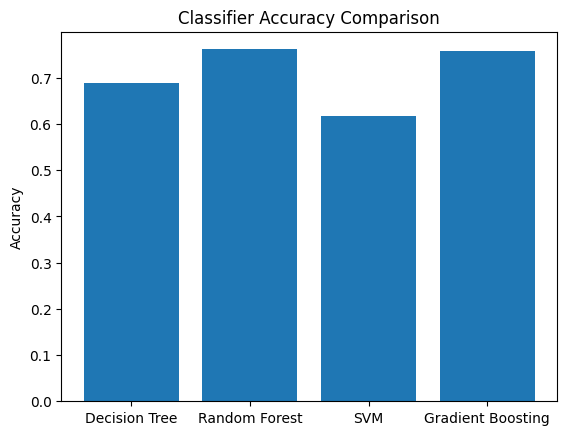

In [85]:
import matplotlib.pyplot as plt

plt.bar(results.keys(), results.values())
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()


### Best Hyperparameters

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming modified_data is your DataFrame
# Define features and target variable
features = [
    'day', 'month', 'year', 'encoded_day', 'holiday', 'public_holiday',
    'encoded_state', 'type_wholeblood', 'type_apheresis_platelet',
    'type_apheresis_plasma', 'type_other', 'social_PC1', 'social_PC2',
    'social_PC3', 'donation_PC1', 'donation_PC2', 'location_PC1', 'location_PC2'
]
target = 'daily_trend'

# Prepare features (X) and target (y)
X = modified_data[features]  # Independent variables
y = modified_data[target]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up the Grid Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model to the training data using Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Train the Random Forest model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2

/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_

/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
93 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File

Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation Score: 0.7628660394944984
Classification Report:
              precision    recall  f1-score   support

   downtrend       0.75      0.73      0.74      6766
      stable       0.90      0.79      0.84      1179
     uptrend       0.76      0.79      0.77      7090

    accuracy                           0.76     15035
   macro avg       0.80      0.77      0.78     15035
weighted avg       0.76      0.76      0.76     15035

Accuracy Score: 0.7626870635184569


### Model Evaluation (Random Forest)

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

features = [
    'day', 'month', 'year', 'encoded_day', 'holiday', 'public_holiday',
    'encoded_state', 'type_wholeblood', 'type_apheresis_platelet',
    'type_apheresis_plasma', 'type_other', 'social_PC1', 'social_PC2',
    'social_PC3', 'donation_PC1', 'donation_PC2', 'location_PC1', 'location_PC2'
]
target = 'daily_trend'

# Prepare features (X) and target (y)
X = modified_data[features]  # Independent variables
y = modified_data[target]  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier with best hyperparameters
model = RandomForestClassifier(n_estimators=200, max_depth=20, 
                               max_features='sqrt', min_samples_leaf=4, 
                               min_samples_split=2, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model (optional)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

   downtrend       0.74      0.73      0.74      6766
      stable       0.89      0.79      0.83      1179
     uptrend       0.76      0.79      0.78      7090

    accuracy                           0.76     15035
   macro avg       0.80      0.77      0.78     15035
weighted avg       0.76      0.76      0.76     15035

Accuracy: 0.7632856667775191


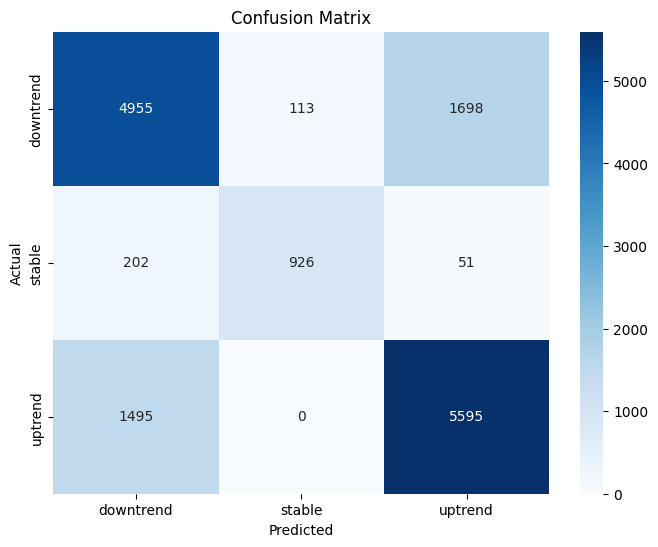

In [89]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
# Assuming y_test and y_pred are defined earlier in the code
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [90]:

# Create a date range for October 2024
date_range = pd.date_range(start='2024-09-17', end='2024-10-16')
future_predictions = []

# Loop through each date in the date range
for date in date_range:
    day = date.day
    month = date.month
    year = date.year

    # Loop through unique encoded states from modified_data
    for state in modified_data['encoded_state'].unique():
        # Only include Johor, Kedah, Kelantan, and W.P. Kuala Lumpur (encoded as 0, 1, 2, 12)
        if state in [0, 1, 2, 12]:
            future_data = {
                'day': day,
                'month': month,
                'year': year,  # Include year here
                'encoded_day': date.weekday(),  # 0=Monday, 6=Sunday
                'holiday': 0,  # Placeholder for actual holiday logic
                'public_holiday': 0,  # Placeholder for actual public holiday logic
                'encoded_state': state,  # Use your actual encoding logic
                'type_wholeblood': 0,  # Placeholder for actual data
                'type_apheresis_platelet': 0,
                'type_apheresis_plasma': 0,
                'type_other': 0,
                'social_PC1': 0,
                'social_PC2': 0,
                'social_PC3': 0,
                'donation_PC1': 0,
                'donation_PC2': 0,
                'location_PC1': 0,
                'location_PC2': 0,
            }
            future_predictions.append(future_data)

# Create a DataFrame from the future predictions
future_df = pd.DataFrame(future_predictions)

# Define the features for prediction; these should match those used in training the model
prediction_features = [
    'day', 'month', 'year', 'encoded_day', 'holiday', 'public_holiday',
    'encoded_state', 'type_wholeblood', 'type_apheresis_platelet',
    'type_apheresis_plasma', 'type_other', 'social_PC1', 'social_PC2',
    'social_PC3', 'donation_PC1', 'donation_PC2', 'location_PC1', 'location_PC2'
]

# Predict the trends using the trained Random Forest model
predicted_trends = model.predict(future_df[prediction_features])

# Add predictions to the DataFrame
future_df['trend'] = predicted_trends
future_df['date'] = pd.to_datetime(future_df[['year', 'month', 'day']])

# Decode encoded states (replace with your actual decoding logic)
state_mapping = {
    0: 'Johor',
    1: 'Kedah',
    2: 'Kelantan',
    12: 'W.P. Kuala Lumpur'
}
future_df['state'] = future_df['encoded_state'].map(state_mapping)

# Add the day of the week to the DataFrame
future_df['day_of_week'] = future_df['date'].dt.day_name()

# Select relevant columns for final output
output = future_df[['date', 'state', 'day_of_week', 'trend']]

# Display the future predictions
print("\nFuture Predictions for October 2024:")
print(output)


Future Predictions for October 2024:
          date              state day_of_week      trend
0   2024-09-17              Johor     Tuesday  downtrend
1   2024-09-17              Kedah     Tuesday  downtrend
2   2024-09-17           Kelantan     Tuesday    uptrend
3   2024-09-17  W.P. Kuala Lumpur     Tuesday  downtrend
4   2024-09-18              Johor   Wednesday    uptrend
..         ...                ...         ...        ...
115 2024-10-15  W.P. Kuala Lumpur     Tuesday  downtrend
116 2024-10-16              Johor   Wednesday    uptrend
117 2024-10-16              Kedah   Wednesday    uptrend
118 2024-10-16           Kelantan   Wednesday    uptrend
119 2024-10-16  W.P. Kuala Lumpur   Wednesday    uptrend

[120 rows x 4 columns]


In [91]:
# Filter the output DataFrame for rows where state is 'Johor'
johor_predictions = output[output['state'] == 'Johor']

# Display the filtered predictions for Johor
print("\nFiltered Predictions for Johor:")
johor_predictions



Filtered Predictions for Johor:


,date,state,day_of_week,trend
0,2024-09-17,Johor,Tuesday,downtrend
4,2024-09-18,Johor,Wednesday,uptrend
8,2024-09-19,Johor,Thursday,uptrend
12,2024-09-20,Johor,Friday,uptrend
16,2024-09-21,Johor,Saturday,uptrend
20,2024-09-22,Johor,Sunday,uptrend
24,2024-09-23,Johor,Monday,downtrend
28,2024-09-24,Johor,Tuesday,downtrend
32,2024-09-25,Johor,Wednesday,uptrend
36,2024-09-26,Johor,Thursday,uptrend


In [92]:
# Filter the output DataFrame for rows where state is 'Johor'
kedah_predictions = output[output['state'] == 'Kedah']

# Display the filtered predictions for Johor
print("\nFiltered Predictions for Kedah:")
kedah_predictions



Filtered Predictions for Kedah:


,date,state,day_of_week,trend
1,2024-09-17,Kedah,Tuesday,downtrend
5,2024-09-18,Kedah,Wednesday,uptrend
9,2024-09-19,Kedah,Thursday,uptrend
13,2024-09-20,Kedah,Friday,uptrend
17,2024-09-21,Kedah,Saturday,uptrend
21,2024-09-22,Kedah,Sunday,uptrend
25,2024-09-23,Kedah,Monday,downtrend
29,2024-09-24,Kedah,Tuesday,downtrend
33,2024-09-25,Kedah,Wednesday,uptrend
37,2024-09-26,Kedah,Thursday,uptrend


In [93]:
# Filter the output DataFrame for rows where state is 'Johor'
kelantan_predictions = output[output['state'] == 'Kelantan']

# Display the filtered predictions for Johor
print("\nFiltered Predictions for Kelantan:")
kelantan_predictions



Filtered Predictions for Kelantan:


,date,state,day_of_week,trend
2,2024-09-17,Kelantan,Tuesday,uptrend
6,2024-09-18,Kelantan,Wednesday,uptrend
10,2024-09-19,Kelantan,Thursday,uptrend
14,2024-09-20,Kelantan,Friday,uptrend
18,2024-09-21,Kelantan,Saturday,uptrend
22,2024-09-22,Kelantan,Sunday,uptrend
26,2024-09-23,Kelantan,Monday,uptrend
30,2024-09-24,Kelantan,Tuesday,uptrend
34,2024-09-25,Kelantan,Wednesday,uptrend
38,2024-09-26,Kelantan,Thursday,uptrend


In [94]:
# Filter the output DataFrame for rows where state is 'Johor'
kl_predictions = output[output['state'] == 'W.P. Kuala Lumpur']

# Display the filtered predictions for Johor
print("\nFiltered Predictions for KL:")
kl_predictions



Filtered Predictions for KL:


,date,state,day_of_week,trend
3,2024-09-17,W.P. Kuala Lumpur,Tuesday,downtrend
7,2024-09-18,W.P. Kuala Lumpur,Wednesday,uptrend
11,2024-09-19,W.P. Kuala Lumpur,Thursday,uptrend
15,2024-09-20,W.P. Kuala Lumpur,Friday,downtrend
19,2024-09-21,W.P. Kuala Lumpur,Saturday,downtrend
23,2024-09-22,W.P. Kuala Lumpur,Sunday,uptrend
27,2024-09-23,W.P. Kuala Lumpur,Monday,downtrend
31,2024-09-24,W.P. Kuala Lumpur,Tuesday,downtrend
35,2024-09-25,W.P. Kuala Lumpur,Wednesday,uptrend
39,2024-09-26,W.P. Kuala Lumpur,Thursday,uptrend


## TIME-SERIES MODELS (SARIMAX)

For predicting daily donations (Johor, Kedah, Kelantan and W.P. Kuala Lumpur)

In [95]:
modified_data

,date,state,daily,blood_a,blood_b,blood_o,blood_ab,type_wholeblood,type_apheresis_platelet,type_apheresis_plasma,...,donation_PC2,location_PC1,location_PC2,day,encoded_state,day_of_week,encoded_day,daily_trend,holiday,public_holiday
0,2006-01-01,Johor,87,19,20,45,3,87,0,0,...,0.103413,-0.284225,-0.225601,1,0,Sunday,0,stable,1,1
1,2006-01-02,Johor,15,4,3,6,2,15,0,0,...,-0.041792,-0.532593,0.022768,2,0,Monday,1,downtrend,0,0
2,2006-01-03,Johor,8,2,2,4,0,8,0,0,...,-0.057841,-0.556740,0.046915,3,0,Tuesday,2,downtrend,0,0
3,2006-01-04,Johor,33,7,11,12,3,33,0,0,...,0.093648,-0.470501,-0.039324,4,0,Wednesday,3,uptrend,0,0
4,2006-01-05,Johor,20,3,8,8,1,20,0,0,...,0.032452,-0.515345,0.005520,5,0,Thursday,4,downtrend,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75169,2024-09-12,W.P. Kuala Lumpur,662,166,204,256,36,643,13,6,...,-1.656637,1.436005,1.342848,12,12,Thursday,4,uptrend,0,0
75170,2024-09-13,W.P. Kuala Lumpur,427,107,106,179,35,405,11,11,...,-0.533575,0.729142,0.753270,13,12,Friday,5,downtrend,0,0
75171,2024-09-14,W.P. Kuala Lumpur,450,125,128,178,19,428,15,7,...,-0.736614,0.819431,0.526200,14,12,Saturday,6,uptrend,1,0
75172,2024-09-15,W.P. Kuala Lumpur,668,185,157,294,32,668,0,0,...,-1.037085,1.460987,1.264343,15,12,Sunday,0,uptrend,1,0


In [96]:
import pandas as pd

# Assuming modified_data is already defined
# Display the original DataFrame shape
print("Original DataFrame shape:", modified_data.shape)

# Drop specified columns
columns_to_drop = [
    'encoded_state', 
    'day_of_week', 
    'blood_a', 
    'blood_b', 
    'blood_ab', 
    'blood_o',
    'year',
    'month',
    'day',
    'daily_trend',
    'type_wholeblood',
    'type_apheresis_platelet',
    'type_apheresis_plasma',
    'type_other',
]
arima_data = modified_data.drop(columns=columns_to_drop)

# Resetting the index to make 'date' a column again (optional)
arima_data.reset_index(inplace=True)

# Display the new DataFrame shape and its head
print("New DataFrame shape:", arima_data.shape)
arima_data.head()


Original DataFrame shape: (75174, 27)
New DataFrame shape: (75174, 14)


,index,date,state,daily,social_PC1,social_PC2,social_PC3,donation_PC1,donation_PC2,location_PC1,location_PC2,encoded_day,holiday,public_holiday
0,0,2006-01-01,Johor,87,-0.427505,0.005957,0.091326,-0.455377,0.103413,-0.284225,-0.225601,0,1,1
1,1,2006-01-02,Johor,15,-0.580853,0.071814,-0.052262,-0.720272,-0.041792,-0.532593,0.022768,1,0,0
2,2,2006-01-03,Johor,8,-0.594880,0.077810,-0.067610,-0.735948,-0.057841,-0.556740,0.046915,2,0,0
3,3,2006-01-04,Johor,33,-0.533375,0.087657,-0.015366,-0.639291,0.093648,-0.470501,-0.039324,3,0,0
4,4,2006-01-05,Johor,20,-0.543618,0.054990,-0.084146,-0.681960,0.032452,-0.515345,0.005520,4,0,0


In [97]:
arima_data['date'] = pd.to_datetime(arima_data['date'], errors='coerce')

# Set the 'date' column as the index
arima_data.set_index('date', inplace=True)

# Optionally, you can drop the old index column if it is no longer needed
arima_data.drop(columns=['index'], inplace=True)

# Check the updated DataFrame
print(arima_data.head())

            state  daily  social_PC1  social_PC2  social_PC3  donation_PC1  \
date                                                                         
2006-01-01  Johor     87   -0.427505    0.005957    0.091326     -0.455377   
2006-01-02  Johor     15   -0.580853    0.071814   -0.052262     -0.720272   
2006-01-03  Johor      8   -0.594880    0.077810   -0.067610     -0.735948   
2006-01-04  Johor     33   -0.533375    0.087657   -0.015366     -0.639291   
2006-01-05  Johor     20   -0.543618    0.054990   -0.084146     -0.681960   

            donation_PC2  location_PC1  location_PC2  encoded_day  holiday  \
date                                                                         
2006-01-01      0.103413     -0.284225     -0.225601            0        1   
2006-01-02     -0.041792     -0.532593      0.022768            1        0   
2006-01-03     -0.057841     -0.556740      0.046915            2        0   
2006-01-04      0.093648     -0.470501     -0.039324           

In [98]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Function to fit SARIMAX model and return fitted model
def fit_sarimax(p, d, q, P, D, Q, s, exog):
    model = SARIMAX(daily_donations, order=(p, d, q), 
                    seasonal_order=(P, D, Q, s), 
                    exog=exog)
    model_fit = model.fit(disp=False)  # Suppress the fitting output
    return model_fit

# Define the state mapping for Johor, Kedah, Kelantan, and W.P. Kuala Lumpur
state_mapping = {
    0: 'Johor',
    1: 'Kedah',
    2: 'Kelantan',
    12: 'W.P. Kuala Lumpur'
}

# Filter to the desired states only
states = [0, 1, 2, 12]

# Create a DataFrame to store best AIC values for each state
best_aic_values = {}
model_fit_results = {}

# Loop through each state to fit the model
for state in states:
    state_name = state_mapping[state]
    state_data = arima_data[arima_data['state'] == state_name]
    
    # Define the target variable and exogenous features for the current state
    daily_donations = state_data['daily']
    exogenous_features = state_data[['social_PC1', 'social_PC2', 'social_PC3', 
                                     'donation_PC1', 'donation_PC2', 
                                     'location_PC1', 'location_PC2', 
                                     'encoded_day', 'holiday', 'public_holiday']]
    
    # Use fixed values for p, d, q, P, D, Q, and s
    p, d, q = 1, 1, 1  # Non-seasonal parameters
    P, D, Q, s = 1, 1, 1, 7  # Seasonal parameters (weekly seasonality)

    try:
        # Fit the SARIMAX model with fixed hyperparameters
        model_fit = fit_sarimax(p, d, q, P, D, Q, s, exogenous_features)
        # Store the AIC value and fitted model
        best_aic_values[state_name] = (p, d, q, P, D, Q, s, model_fit.aic)
        model_fit_results[state_name] = model_fit  # Store the fitted model
    except Exception as e:
        print(f"Error fitting model for state {state_name}: {e}")

# Display the results
for state_name in state_mapping.values():
    if state_name in best_aic_values:
        print(f"Best AIC for state {state_name}: {best_aic_values[state_name][-1]}")
        print(f"Fitted Model Summary for state {state_name}:\n{model_fit_results[state_name].summary()}\n")


/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/tuanuzma/Desktop/Lab/ProjectCapstone3/Presentation_Project_3/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred fr

Best AIC for state Johor: -125969.06964237499
Fitted Model Summary for state Johor:
                                     SARIMAX Results                                     
Dep. Variable:                             daily   No. Observations:                 6834
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               62999.535
Date:                           Mon, 07 Oct 2024   AIC                        -125969.070
Time:                                   13:02:43   BIC                        -125866.642
Sample:                               01-01-2006   HQIC                       -125933.730
                                    - 09-16-2024                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
social_PC1       123.2483   4.

In [99]:
# Display unique state names to check for variations
unique_states = arima_data['state'].unique()
print("Unique states in the DataFrame:", unique_states)


Unique states in the DataFrame: ['Johor' 'Kedah' 'Kelantan' 'Melaka' 'Negeri Sembilan' 'Perak'
 'Pulau Pinang' 'Sarawak' 'Selangor' 'Terengganu' 'W.P. Kuala Lumpur']



Seasonal Model Fit Summary for state Johor:
                                     SARIMAX Results                                     
Dep. Variable:                             daily   No. Observations:                 6834
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               62999.535
Date:                           Mon, 07 Oct 2024   AIC                        -125969.070
Time:                                   13:12:00   BIC                        -125866.642
Sample:                               01-01-2006   HQIC                       -125933.730
                                    - 09-16-2024                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
social_PC1       123.2483   4.29e-06   2.87e+07      0.000     123.24

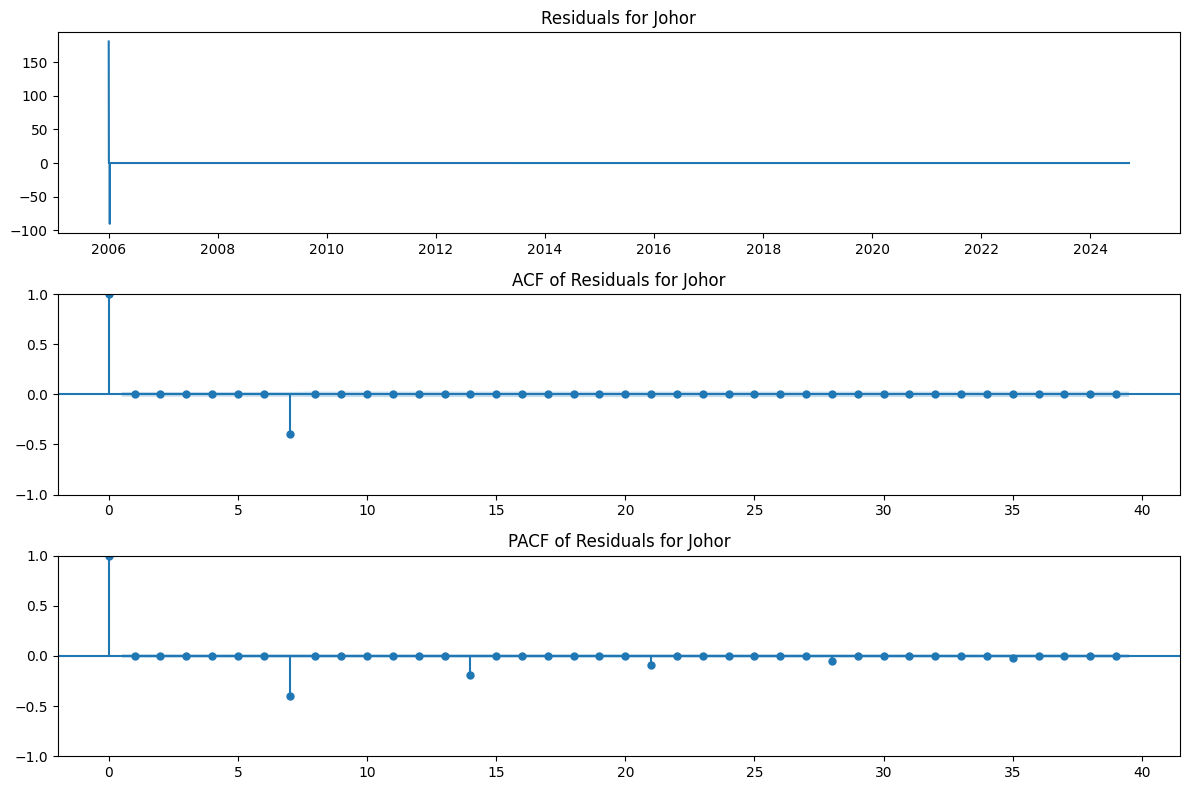

Ljung-Box test statistic for Johor: l, p-value: l

Seasonal Model Fit Summary for state Kedah:
                                     SARIMAX Results                                     
Dep. Variable:                             daily   No. Observations:                 6834
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               66390.287
Date:                           Mon, 07 Oct 2024   AIC                        -132750.573
Time:                                   13:12:00   BIC                        -132648.146
Sample:                               01-01-2006   HQIC                       -132715.234
                                    - 09-16-2024                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
social_PC1       12

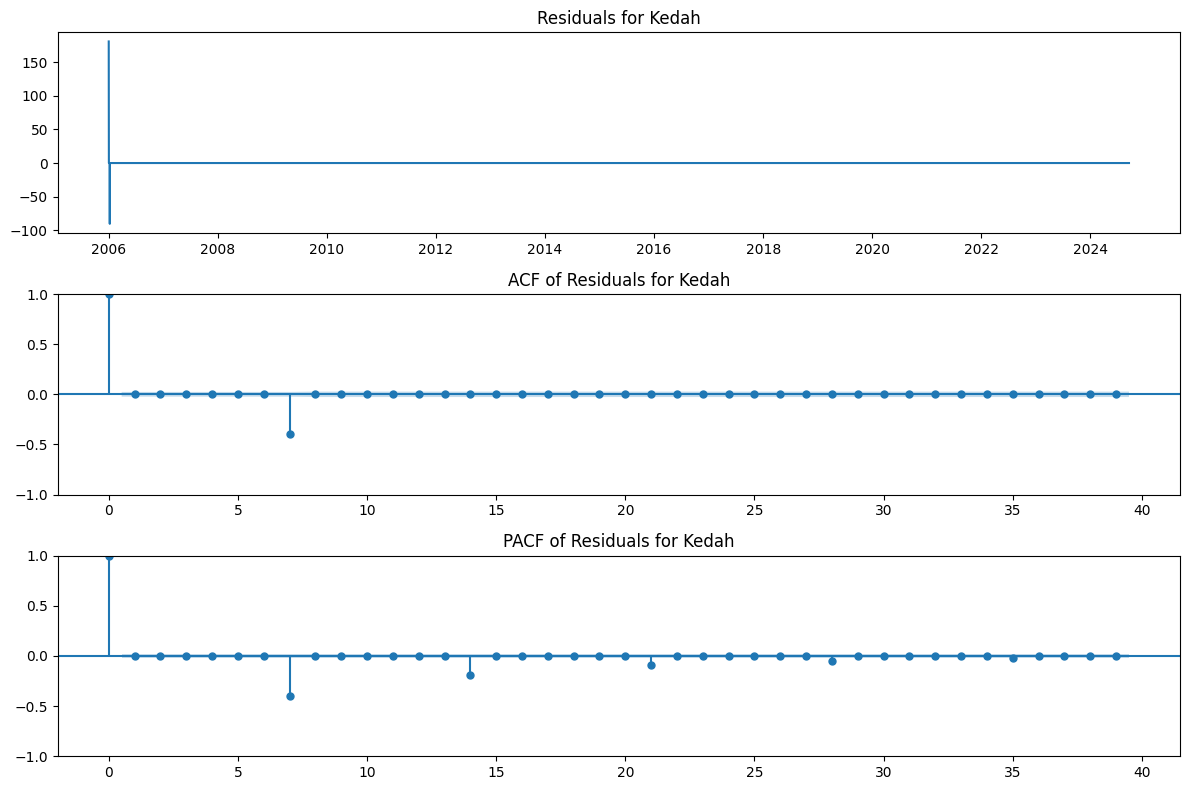

Ljung-Box test statistic for Kedah: l, p-value: l

Seasonal Model Fit Summary for state Kelantan:
                                     SARIMAX Results                                     
Dep. Variable:                             daily   No. Observations:                 6834
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               70589.149
Date:                           Mon, 07 Oct 2024   AIC                        -141148.299
Time:                                   13:12:00   BIC                        -141045.872
Sample:                               01-01-2006   HQIC                       -141112.959
                                    - 09-16-2024                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
social_PC1      

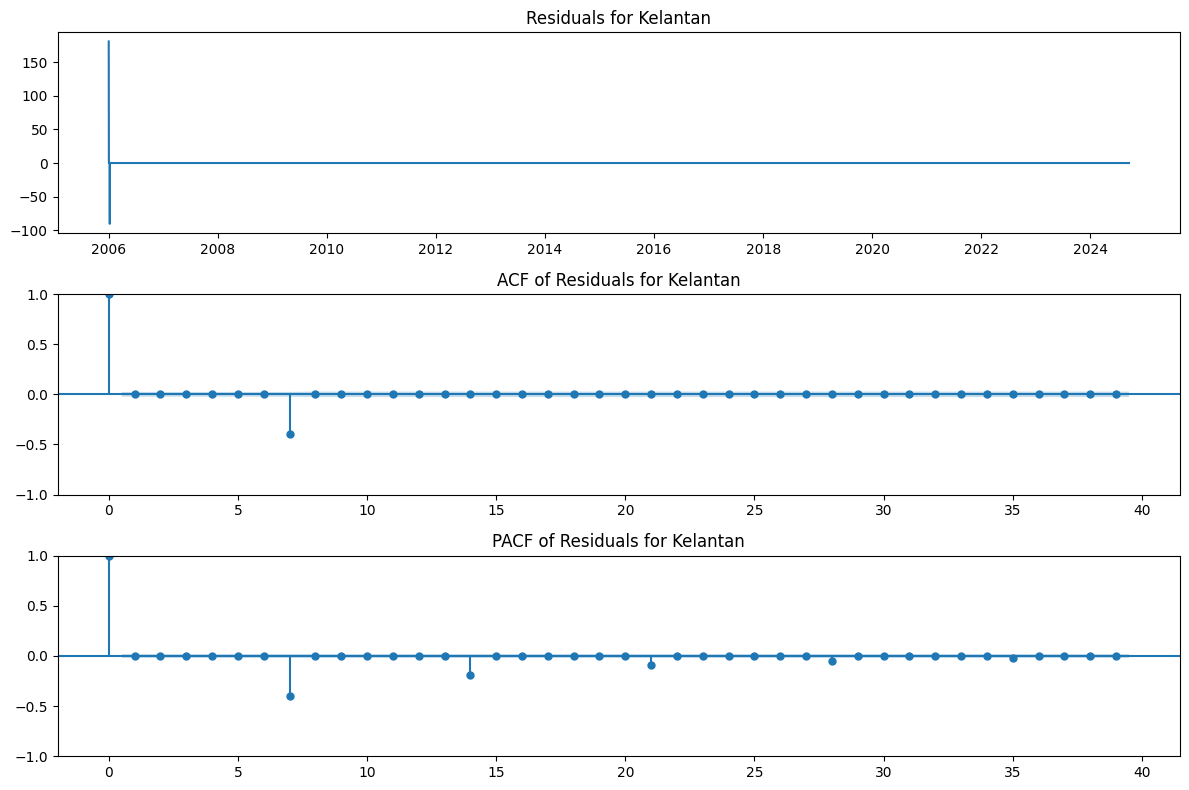

Ljung-Box test statistic for Kelantan: l, p-value: l

Seasonal Model Fit Summary for state W.P. Kuala Lumpur:
                                     SARIMAX Results                                     
Dep. Variable:                             daily   No. Observations:                 6834
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               62944.944
Date:                           Mon, 07 Oct 2024   AIC                        -125859.887
Time:                                   13:12:00   BIC                        -125757.460
Sample:                               01-01-2006   HQIC                       -125824.548
                                    - 09-16-2024                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
soci

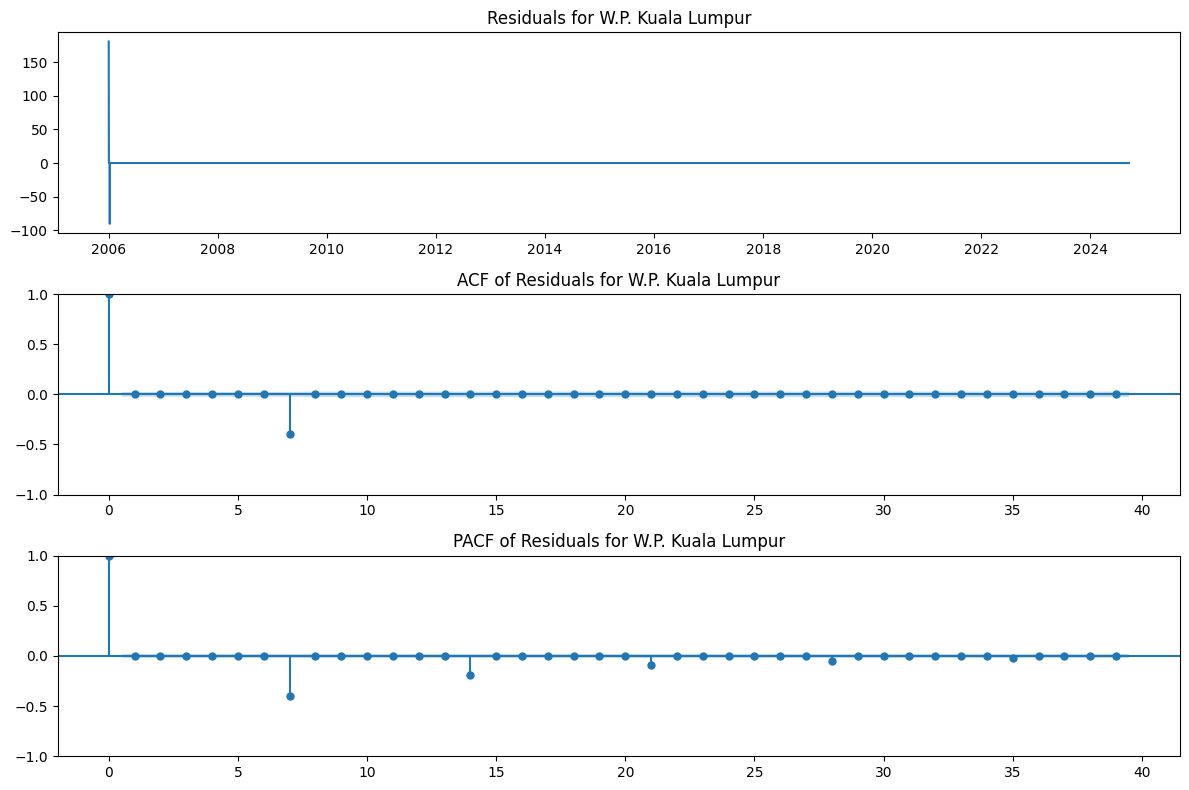

Ljung-Box test statistic for W.P. Kuala Lumpur: l, p-value: l


In [100]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

# Display the seasonal_model_fit summary for the selected states
for state, model_fit in model_fit_results.items():
    print(f"\nSeasonal Model Fit Summary for state {state}:")
    print(model_fit.summary())

    # Residuals
    residuals = model_fit.resid

    # Plot Residuals, ACF, and PACF
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 1, 1)
    plt.plot(residuals)
    plt.title(f'Residuals for {state}')
    plt.subplot(3, 1, 2)
    plot_acf(residuals, ax=plt.gca())
    plt.title(f'ACF of Residuals for {state}')
    plt.subplot(3, 1, 3)
    plot_pacf(residuals, ax=plt.gca())
    plt.title(f'PACF of Residuals for {state}')
    plt.tight_layout()
    plt.show()

    # Ljung-Box Test
    lb_stat, lb_pvalue = acorr_ljungbox(residuals, lags=[1], return_df=False)
    print(f"Ljung-Box test statistic for {state}: {lb_stat[0]}, p-value: {lb_pvalue[0]}")


In [101]:
print(state_data.index)  # Check the original index


DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10',
               '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14',
               '2024-09-15', '2024-09-16'],
              dtype='datetime64[ns]', name='date', length=6834, freq=None)


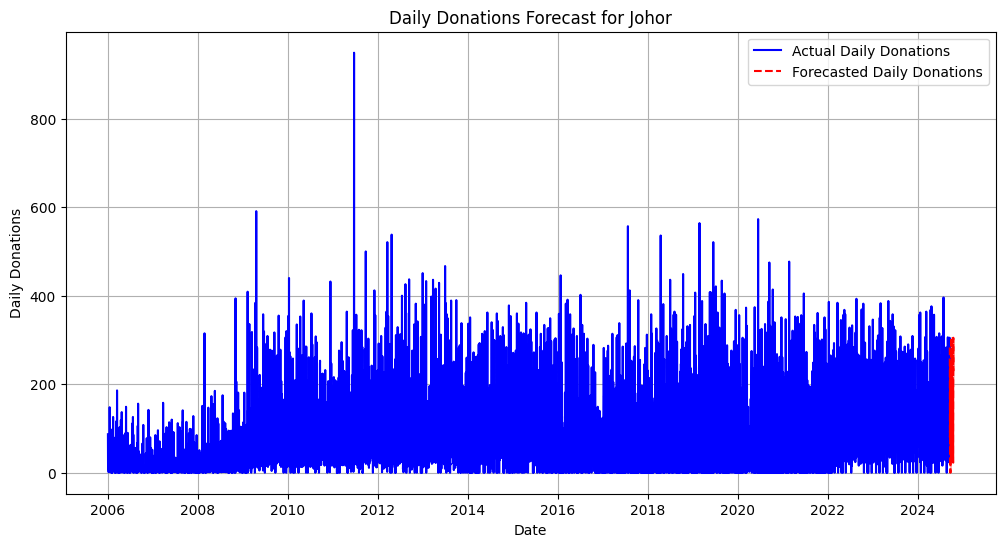

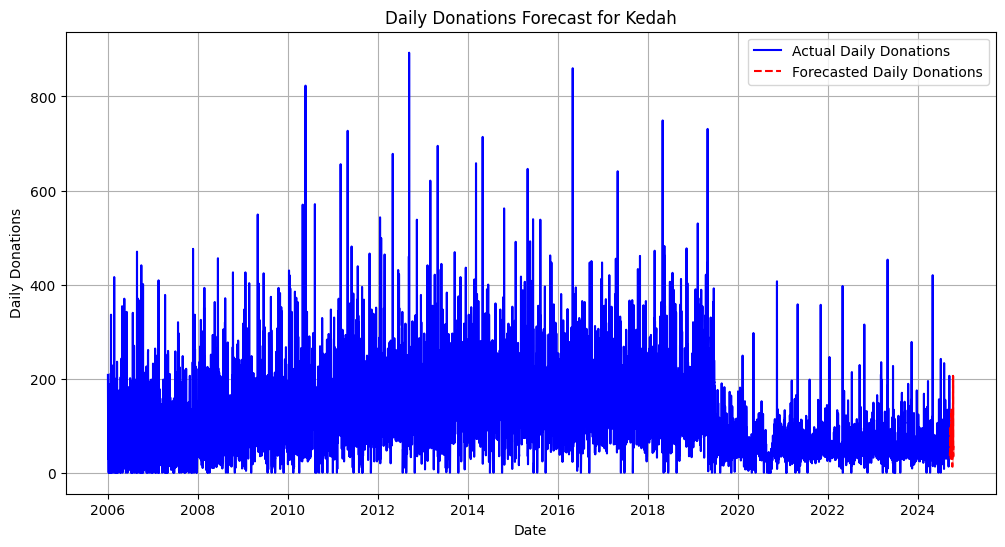

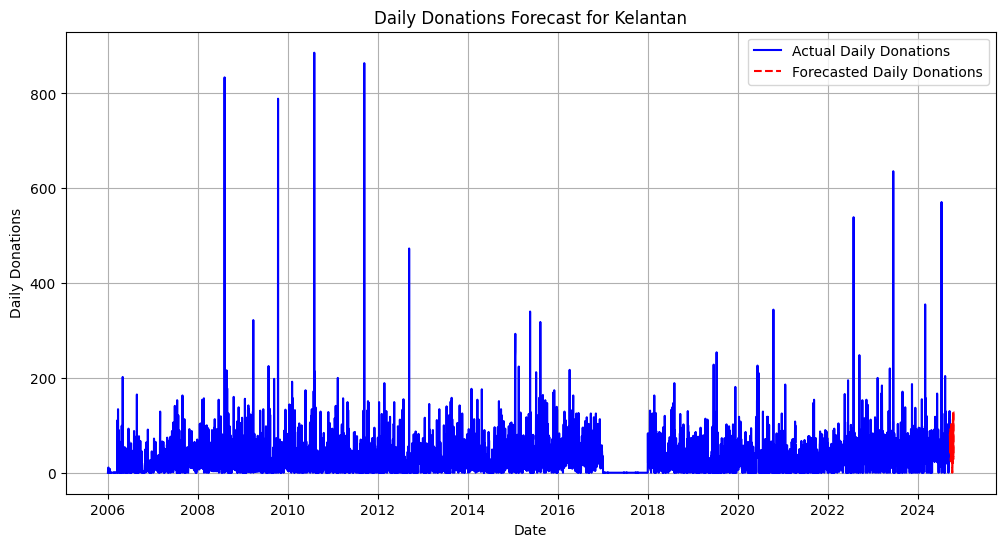

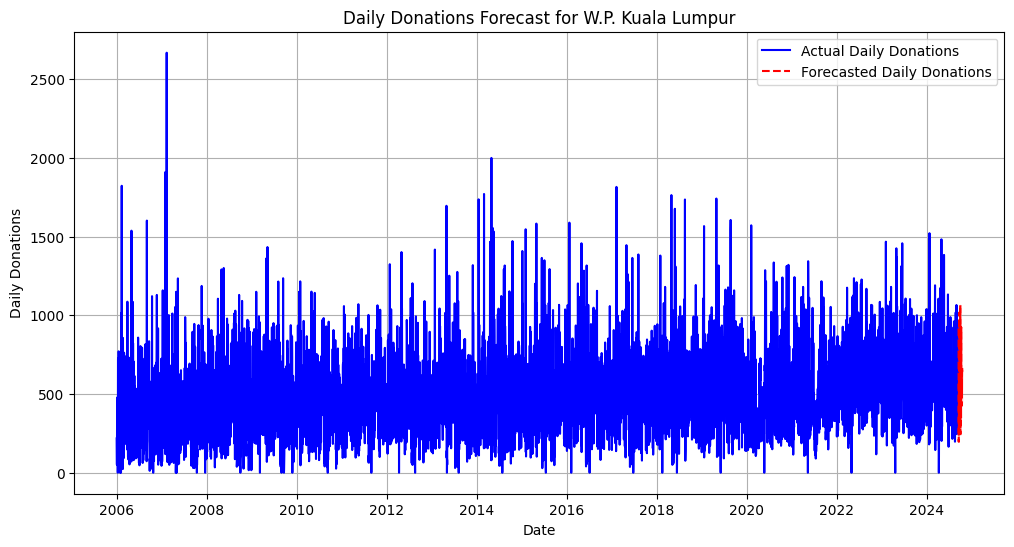

In [102]:
# Forecast for the next 30 days and store it in a dictionary
forecast_results = {}  # Dictionary to store forecasted DataFrames for each state

for state, model_fit in model_fit_results.items():
    state_data = arima_data[arima_data['state'] == state]
    exogenous_features = state_data[['social_PC1', 'social_PC2', 'social_PC3', 
                                      'donation_PC1', 'donation_PC2', 
                                      'location_PC1', 'location_PC2', 
                                      'encoded_day', 'holiday', 'public_holiday']]

    # Forecast the next 30 days
    forecast = model_fit.get_forecast(steps=30, exog=exogenous_features[-30:])
    
    # Ensure state_data index is datetime before generating the forecast index
    if not pd.api.types.is_datetime64_any_dtype(state_data.index):
        state_data.index = pd.to_datetime(state_data.index)

    # Create the date range for the forecast
    forecast_index = pd.date_range(start=state_data.index[-1] + pd.Timedelta(days=1), periods=30)
    
    # Create DataFrame for forecasted values
    forecast_df = forecast.summary_frame()
    forecast_df.index = forecast_index
    forecast_df['state'] = state
    
    # Round off the 'mean' values
    forecast_df['mean_rounded'] = forecast_df['mean'].round()

    # Initialize trend column with 'stable' as default
    forecast_df['trend'] = 'stable'

    # Loop through forecast_df to calculate trends by comparing with the previous day's rounded mean
    for i in range(1, len(forecast_df)):
        if forecast_df['mean_rounded'].iloc[i] > forecast_df['mean_rounded'].iloc[i-1]:
            forecast_df.at[forecast_df.index[i], 'trend'] = 'uptrend'
        elif forecast_df['mean_rounded'].iloc[i] < forecast_df['mean_rounded'].iloc[i-1]:
            forecast_df.at[forecast_df.index[i], 'trend'] = 'downtrend'

    # Store the forecast_df for this state in the dictionary
    forecast_results[state] = forecast_df

    # (Optional) Plot the forecast if needed
    plt.figure(figsize=(12, 6))
    plt.plot(state_data.index, state_data['daily'], label='Actual Daily Donations', color='blue')
    plt.plot(forecast_df.index, forecast_df['mean'], label='Forecasted Daily Donations', color='red', linestyle='--')
    plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='red', alpha=0.3)
    plt.title(f'Daily Donations Forecast for {state}')
    plt.xlabel('Date')
    plt.ylabel('Daily Donations')
    plt.legend()
    plt.grid()
    plt.show()


In [103]:
# Display forecasted table for Johor
forecast_results['Johor'][['mean', 'mean_ci_lower', 'mean_ci_upper', 'trend']]


daily,mean,mean_ci_lower,mean_ci_upper,trend
2024-09-17,283.000198,283.000142,283.000254,stable
2024-09-18,79.999971,79.999913,80.000030,downtrend
2024-09-19,115.999971,115.999910,116.000032,uptrend
2024-09-20,242.999827,242.999764,242.999890,uptrend
2024-09-21,80.999820,80.999755,80.999886,downtrend
2024-09-22,-0.000042,-0.000109,0.000026,downtrend
2024-09-23,196.000123,196.000054,196.000193,uptrend
2024-09-24,193.000171,193.000092,193.000249,downtrend
2024-09-25,41.999964,41.999883,42.000045,downtrend
2024-09-26,124.999970,124.999886,125.000055,uptrend


In [104]:
# Display forecasted table for Johor
forecast_results['Kedah'][['mean', 'mean_ci_lower', 'mean_ci_upper', 'trend']]


daily,mean,mean_ci_lower,mean_ci_upper,trend
2024-09-17,35.999969,35.999929,36.000009,stable
2024-09-18,43.000014,42.999972,43.000057,uptrend
2024-09-19,42.000017,41.999973,42.000062,downtrend
2024-09-20,90.000096,90.000050,90.000143,uptrend
2024-09-21,44.000058,44.000010,44.000106,downtrend
2024-09-22,95.000002,94.999952,95.000052,uptrend
2024-09-23,95.999958,95.999907,96.000010,uptrend
2024-09-24,75.999962,75.999904,76.000021,downtrend
2024-09-25,30.000023,29.999962,30.000085,downtrend
2024-09-26,56.000016,55.999952,56.000080,uptrend


MAE for Johor: 0.03978933072560075
RMSE for Johor: 2.4509669181879383
MAPE for Johor: 0.04976007009654196


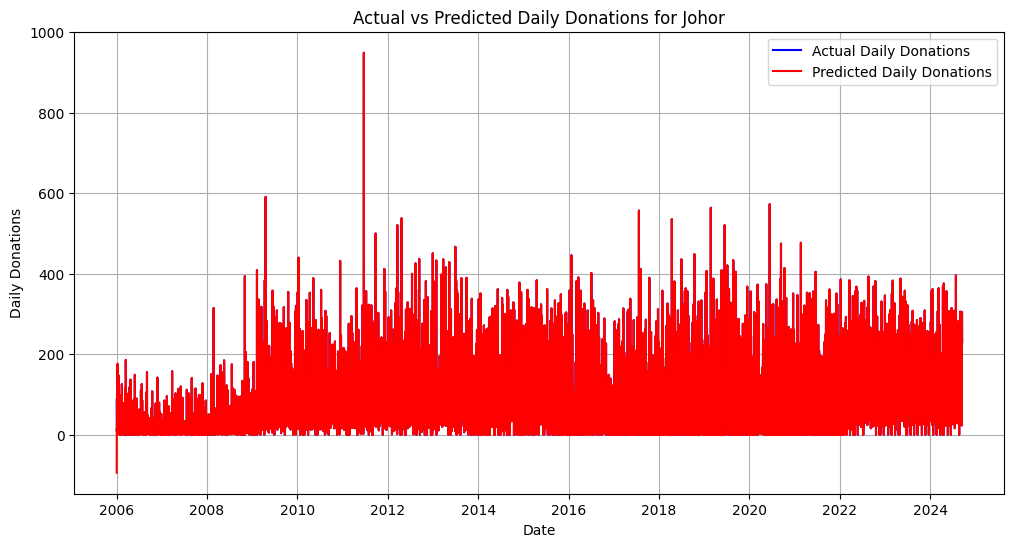

MAE for Kedah: 0.03978388270615996
RMSE for Kedah: 2.4509673919721724
MAPE for Kedah: 0.02173486039840943


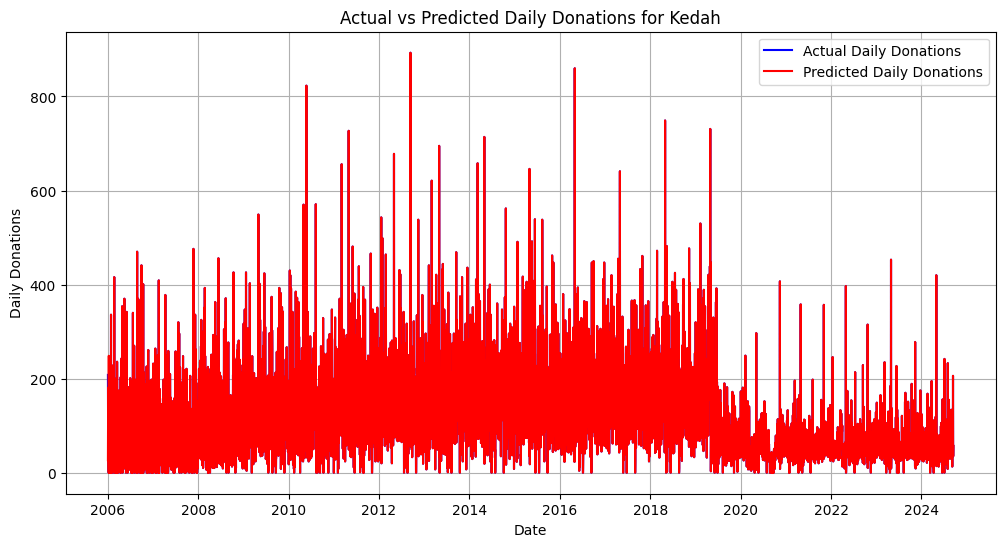

MAE for Kelantan: 0.039777873651973446
RMSE for Kelantan: 2.4509675561640307
MAPE for Kelantan: 3.3206606480071784e-06


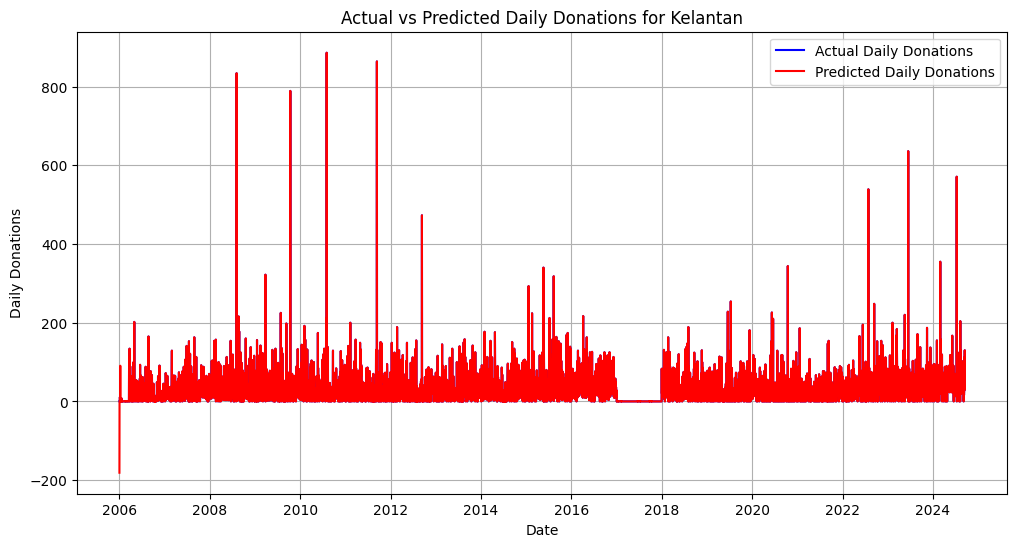

MAE for W.P. Kuala Lumpur: 0.03979425022921045
RMSE for W.P. Kuala Lumpur: 2.450970002606749
MAPE for W.P. Kuala Lumpur: 0.015019524733536606


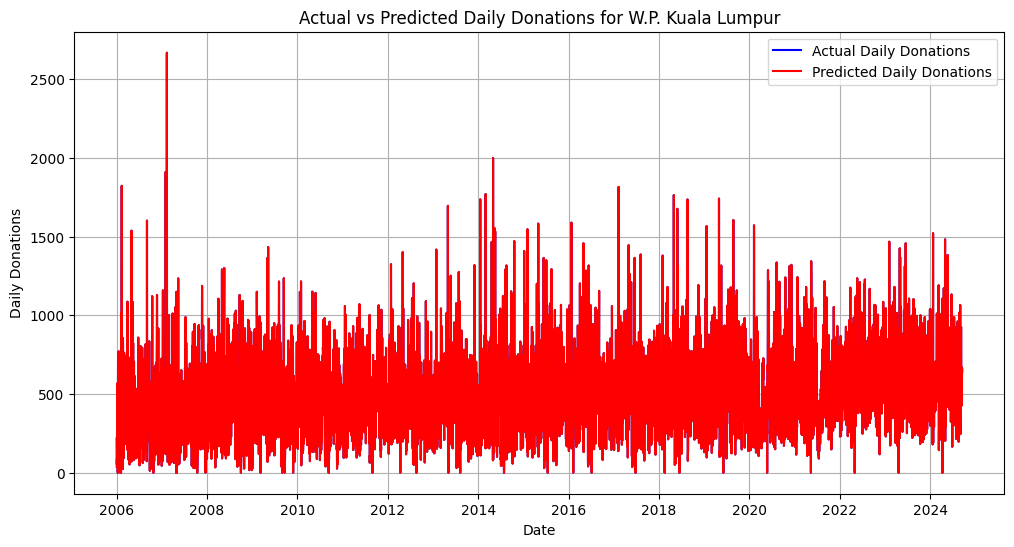

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# MAE, RMSE, MAPE evaluation
for state, model_fit in model_fit_results.items():
    state_data = arima_data[arima_data['state'] == state]
    
    # Actual vs Predicted
    predicted_values = model_fit.predict(start=state_data.index[0], end=state_data.index[-1])

    # MAE and RMSE
    mae = mean_absolute_error(state_data['daily'], predicted_values)
    rmse = np.sqrt(mean_squared_error(state_data['daily'], predicted_values))
    
    # MAPE (handling zero values in actual data)
    actual_non_zero = state_data['daily'].replace(0, np.nan)  # Replace 0 with NaN to avoid division by zero
    mape = np.mean(np.abs((actual_non_zero - predicted_values) / actual_non_zero)) * 100

    print(f"MAE for {state}: {mae}")
    print(f"RMSE for {state}: {rmse}")
    print(f"MAPE for {state}: {mape}")

    # Actual vs Predicted plot
    plt.figure(figsize=(12, 6))
    plt.plot(state_data.index, state_data['daily'], label='Actual Daily Donations', color='blue')
    plt.plot(state_data.index, predicted_values, label='Predicted Daily Donations', color='red')
    plt.title(f'Actual vs Predicted Daily Donations for {state}')
    plt.xlabel('Date')
    plt.ylabel('Daily Donations')
    plt.legend()
    plt.grid()
    plt.show()


### Outliers handling
Recommendation: For predictive modeling, it’s typically better to cap the outliers to prevent the model from being overly influenced by extreme values while still accounting for them in future predictions.

Conclusion: Capping Outliers Over Removal
Since my objectives involve identifying real-world patterns and building predictive models that should handle similar spikes (e.g., major donation drives), capping the outliers will allow me to retain the important information while reducing the risk of distorting the trends and the model.

# 7. CONCLUSION

## Model Training and Evaluation
To predict daily future blood donation trends, several machine learning models were trained and evaluated using metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and Mean Absolute Percentage Error (MAPE). The following models were tested:

1. Decision Tree: Simple and interpretable, but often less powerful compared to ensemble methods.
2. Random Forest: An ensemble of decision trees that performs better by reducing overfitting.
3. Support Vector Machine (SVM): Used for high-dimensional spaces but showed lower accuracy in this project.
4. Gradient Boosting: An iterative method that improves over time, making it slightly better than Decision Trees but not as strong as Random Forest in this case.

***Trend Analysis Key Findings:***

Trends were for key states (Johor, Kedah, Kelantan, and W.P. Kuala Lumpur).
    
    1. Johor shows donation trends remain steady with minimal fluctuations.
    
    This could imply a consistent donor base, unaffected by holidays or specific events. Campaigns in Johor may not need to focus heavily on specific seasonal efforts but rather on maintaining regular donation drives.

    2. Kedah shows The donation trend in Kedah shows moderate fluctuations with noticeable peaks and troughs throughout the year.
    
    The fluctuations suggest that donations are not heavily concentrated unlike Kelantan, Johor and W.P. Kuala lumpur during a particular time of the year, but rather vary across months, with some peaks potentially corresponding to specific events or local activities.
    
    3. Kelantan experiences sharp drops in donations during certain festivals(ex Ramadhan and Eid).

    The cultural significance of these events likely leads to lower participation in donation drives. Campaigns should avoid these periods and instead focus efforts on pre- and post-festival periods to stabilize supply.
    
    4. W.P. Kuala Lumpur has significant spikes in donations occur during public holidays.

    People might be more willing to donate during their time off. Campaigns can be targeted around these holidays to capitalize on the increased willingness to donate.

***Seasonality Detection Analaysis:***

	• Impact of Holidays:
Blood donations significantly decrease during major holidays (e.g., Hari Raya, Chinese New Year).

    • State Variations:
Different states exhibit unique patterns depending on regional holidays and demographic makeup.


***Predictive Modelling Key Findings:***

    • Classification: Used to categorize daily trends as ‘uptrend’, ‘downtrend’, or ‘stable’.
    
	• Time-Series Forecasting: SARIMAX was used to predict future donation rates using historical trends.
    
Accuracy Results:

	• Random Forest: 0.7616 (~80%)
	• Gradient Boosting: 0.7587 (~77%)

Predicted Trends for October 2024:

	• Kelantan: Predicted donation drop during festivals.
	• W.P. Kuala Lumpur: Predicted uptrend in donations during public holidays.

## Best Time-Series Model Performance based on MAE, RMSE and MAPE

**Based on RMSE**: All the models have a similar RMSE value of approximately 2.450, indicating comparable performance in terms of the root mean squared error.

**Based on MAE**: All states also have similar MAE values, hovering around 0.0397–0.0398.

**Based on MAPE**: Kelantan has an extremely low MAPE value (3.3206606480071784e-06), indicating that it may perform better in percentage error prediction compared to the others.

Based on the MAPE values, Kelantan appears to have the best model performance as it has the lowest MAPE, indicating a higher accuracy for percentage-based error predictions. However, overall performance across states is fairly similar when considering MAE and RMSE.

Kelantan MAE: 0.0397

Kelantan RMSE: 2.450

Kelantan MAPE: 3.3206606480071784e-06


## Model Performance

The SARIMAX model is effective at capturing general trends and seasonality in blood donation data but struggles with extreme spikes in donations across all states.


1. Kelantan:
MAE: 0.039777873651973446
RMSE: 2.4509675561640307
MAPE: 3.3206606480071784e-06
Interpretation: Kelantan stands out due to its extremely low MAPE, suggesting a strong fit on a percentage basis, even though there are notable outliers.

2. W.P. Kuala Lumpur:
MAE: 0.03979425022921045
RMSE: 2.450970002606749
MAPE: 0.015019524733536606
Interpretation: W.P. Kuala Lumpur also demonstrates good model performance, though variability in donation numbers presents challenges.

3. Johor and Kedah:
MAE for Johor: 0.03978933072560075
RMSE for Johor: 2.4509669181879383
MAPE for Johor: 0.04976007009654196

MAE for Kedah: 0.03978388270615996
RMSE for Kedah: 2.4509673919721724
MAPE for Kedah: 0.02173486039840943

Interpretation: Johor and Kedah have consistent performance with similar error metrics but, like the other states, see some underprediction during extreme donation events.


## Future Work

1. Feature Engineering: Future improvements could include adding new features, such as local events, holidays, or weather conditions, that may impact blood donation trends.

2. Time-Series Models: Exploring specialized time-series models, such as ARIMA, Prophet, or LSTM (Long Short-Term Memory), could yield more accurate predictions by capturing temporal patterns more effectively.

3. Ensemble Methods: Combining the outputs of multiple models using ensemble techniques like stacking could further enhance predictive accuracy.

4. Seasonality and Holidays: Deeper analysis into the impact of seasonal events, holidays, and local cultural practices on donation patterns could provide more granular insights for targeted donation drives.